# Glosario de términos

MP -- Minutes Played

FG -- Field Goals

FGA -- Field Goal Attempts

FG% -- Field Goal Percentage

3P -- 3-Point Field Goals

3PA -- 3-Point Field Goal Attempts

3P% -- 3-Point Field Goal Percentage

FT -- Free Throws

FTA -- Free Throw Attempts

FT% -- Free Throw Percentage

ORB -- Offensive Rebounds

DRB -- Defensive Rebounds

TRB -- Total Rebounds

AST -- Assists

STL -- Steals

BLK -- Blocks

TOV -- Turnovers

PF -- Personal Fouls

PTS -- Points




OFF RATE: **offensive rating**  is a statistic used to measure either a teams offensive performance or an individual player's efficiency at producing points.

**Defensive Player Rating** = (Players Points.Total FG%) + **Opponents Differential**= 1/5 of possessions - Times Fouled+ FTM* FT% * OAPOW( Official Adjusted Players Offensive Withstand). 

***********************************************************************************************

DEFF RATE: **Defensive rating** is a statistic used to measure an individual player's efficiency at preventing the other team from scoring points

**Defensive Player Rating** = (Players Steals.Blocks) + **Opponents Differential**= 1/5 of possessions - Times blown by + Deflections * OAPDW( Official Adjusted Players Defensive Withstand).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings(action='ignore')
%matplotlib inline
%pylab
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Parte I: Exploración, limpieza, selección de variables, entre otros.
## Analisis exploratorio

In [2]:
data = pd.read_csv('../Nuevas_variables/v3/input_extendidov3.csv')
data.head(10)

,Unnamed: 0,Date,Year,Season,local_team,visitor_team,Points,Opponent_Points,Result,LOCAL_Racha,...,local_played_visitor,visitor_played_visitor,visitor_played_local,place_local_played,place_visitor_played,avg_distance_place_visitor_played,avg_distance_place_local_played,distance_between_stadiums,distance_local_traveled,distance_visitor_traveled
0,0,Nov 7,2015,2016,Philadelphia 76ers,Orlando Magic,97,105,1,-5,...,1,1,0,Milwaukee Bucks,Houston Rockets,190.000000,329.333333,1806.0,988.0,570.0
1,1,Nov 9,2015,2016,Philadelphia 76ers,Chicago Bulls,88,111,1,-6,...,0,0,0,Philadelphia 76ers,Nada,NaN,0.000000,1002.0,0.0,NaN
2,2,Nov 11,2015,2016,Philadelphia 76ers,Toronto Raptors,103,119,1,-7,...,0,0,1,Philadelphia 76ers,Toronto Raptors,301.000000,0.000000,301.0,0.0,301.0
3,3,Nov 16,2015,2016,Philadelphia 76ers,Dallas Mavericks,86,92,1,-10,...,1,1,0,San Antonio Spurs,Houston Rockets,285.000000,3841.000000,314.0,7682.0,570.0
4,4,Dec 18,2015,2016,Philadelphia 76ers,New York Knicks,97,107,1,-8,...,1,0,1,Atlanta Hawks,New York Knicks,203.500000,226.000000,407.0,452.0,407.0
5,5,Jan 4,2016,2016,Philadelphia 76ers,Minnesota Timberwolves,109,99,0,-2,...,1,0,1,Sacramento Kings,Minnesota Timberwolves,694.500000,600.400000,1389.0,3002.0,1389.0
6,6,Jan 7,2016,2016,Philadelphia 76ers,Atlanta Hawks,98,126,1,1,...,0,1,0,Philadelphia 76ers,New York Knicks,203.500000,0.000000,452.0,0.0,407.0
7,7,Jan 10,2016,2016,Philadelphia 76ers,Cleveland Cavaliers,85,95,1,-2,...,0,1,0,Philadelphia 76ers,Washington Wizards,148.500000,0.000000,1464.0,0.0,594.0
8,8,Jan 14,2016,2016,Philadelphia 76ers,Chicago Bulls,111,115,1,-3,...,0,1,0,Philadelphia 76ers,Washington Wizards,198.000000,0.000000,1002.0,0.0,594.0
9,9,Jan 26,2016,2016,Philadelphia 76ers,Phoenix Suns,113,103,0,-1,...,1,0,1,Orlando Magic,Phoenix Suns,144.285714,301.000000,1010.0,1806.0,1010.0


In [3]:
len(data)

3248

In [4]:
data = data.dropna()
len(data)

2739

In [5]:
for column in data.columns:
    print(column)

Unnamed: 0
Date
Year
Season
local_team
visitor_team
Points
Opponent_Points
Result
LOCAL_Racha
ID Partido
LOCAL_Ultimos10Victorias
LOCAL_Ultimos10VDerrotas
VISITANTE_Ultimos10Victorias
VISITANTE_Ultimos10VDerrotas
VISITANTE_Racha
local_Conf_position
local_Win
local_Lose
local_Percentagewl
local_Dif_leader
local_Home_win
local_Home_lose
local_Away_win
local_Away_lose
local_Div_win
local_Div_lose
local_Cnf_win
local_Cnf_lose
local_Icf_win
local_Icf_lose
visitor_Conf_position
visitor_Win
visitor_Lose
visitor_Percentagewl
visitor_Dif_leader
visitor_Home_win
visitor_Home_lose
visitor_Away_win
visitor_Away_lose
visitor_Div_win
visitor_Div_lose
visitor_Cnf_win
visitor_Cnf_lose
visitor_Icf_win
visitor_Icf_lose
local_fg
local_fga
local_fg3
local_fg3a
local_ft
local_fta
local_orb
local_drb
local_trb
local_ast
local_stl
local_blk
local_tov
local_pf
local_pts
local_ft_pct
local_fg_pct
local_fg3_pct
visitor_fg
visitor_fga
visitor_fg3
visitor_fg3a
visitor_ft
visitor_fta
visitor_orb
visitor_drb
visito

## Calculo de variables compuestas

Indicar en el estudio la seleccion de variables por logica del modelo, y comentar aquellas observadas en estudios previos que no tienen ningun sentido incluir

Por ejemplo la ilogica inclusion de la diferencia_visitante_point observado en estudios previos

In [6]:
# COMENTAR A VICTOR ARREGLAR EL NOMBRE DE LAS VARIABLES

data.rename(columns={'LOCAL_Ultimos10VDerrotas':'LOCAL_Ultimos10Derrotas',
                    'VISITANTE_Ultimos10VDerrotas': 'VISITANTE_Ultimos10Derrotas',
                    'Result': 'target'}, inplace=True)


data['local_visitor_dif_pts'] = data['local_pts'] - data['visitor_pts']

data['LOCAL_porcentaje_victoria_Ultimos10'] = (data['LOCAL_Ultimos10Victorias']) / (data['LOCAL_Ultimos10Victorias'] + data['LOCAL_Ultimos10Derrotas'])
data['VISITANTE_porcentaje_victoria_Ultimos10'] = (data['VISITANTE_Ultimos10Victorias']) / (data['VISITANTE_Ultimos10Victorias'] + data['VISITANTE_Ultimos10Derrotas'])

# COMENTAR A VICTOR SI ES POSIBLE SACAR ESTAS VARIABLES, PREVIAMENTE SON MAS IMPORTANTES QUE 
# LOCAL_porcentajeVictorias O local_Percentagewl

data['LOCAL_porcentaje_victoria_LOCAL'] = (data['local_Home_win']) / (data['local_Home_win'] + data['local_Home_lose'])
data['VISITANTE_porcentaje_victoria_VISITANTE'] = (data['visitor_Home_win']) / (data['visitor_Home_win'] + data['visitor_Home_lose'])


In [7]:
# aqui pasa algo raro con los denominadores de las variables que hace INDETERMINADO los calculos y lleva luego a NA

data = data.dropna()
len(data) 

2718

## Transformacion de variables categoricas

Estrictamente necesario transformar las variables categoricas para modelar con las librerias de Python que estamos utilizando.

Distintos enfoques para trabajar variables categoricas: https://pbpython.com/categorical-encoding.html

Trabajar con variables categoricas en Machine Learning: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/


## Investigar mas a fondo sobre:
## "Maldición de la dimensionalidad"

¿Un posible problema por la escasez de datos y la alta dimensionalidad del modelo? Cerca de 100 variables previo a selección (pendiente de profundizar) 

https://en.wikipedia.org/wiki/Curse_of_dimensionality#Machine_learning

In [8]:
data = pd.get_dummies(data, columns=['Local_Conferencia', 'Local_Division'],
               prefix=['Conf_local', 'Div_local'])

data = pd.get_dummies(data, columns=['Visitor_Conferencia', 'Visitor_Division'],
               prefix=['Conf_visitor', 'Div_visitor'])

data.rename(columns={'Div_local_Atlantic Division':'Div_local_Atlantic',
                    'Div_local_Central Division': 'Div_local_Central',
                    'Div_local_Northwest Division': 'Div_local_Northwest',
                    'Div_local_Pacific Division': 'Div_local_Pacific',
                    'Div_local_Southeast Division': 'Div_local_Southeast',
                    'Div_local_Southwest Division': 'Div_local_Southwest'},inplace=True)

data.rename(columns={'Div_visitor_Atlantic Division':'Div_visitor_Atlantic',
                    'Div_visitor_Central Division': 'Div_visitor_Central',
                    'Div_visitor_Northwest Division': 'Div_visitor_Northwest',
                    'Div_visitor_Pacific Division': 'Div_visitor_Pacific',
                    'Div_visitor_Southeast Division': 'Div_visitor_Southeast',
                    'Div_visitor_Southwest Division': 'Div_visitor_Southwest'},inplace=True)


In [9]:
# Seleccion de variables para análisis de correlación

local = []
def filter_local_name(name):
    if 'Local' in name:
      return name
    if 'LOCAL' in name:
        return name
    if 'local' in name:
        return name
    
for variable in data.columns:
    if (filter_local_name(variable) != None):
        local.append(variable)
print(local)

['local_team', 'LOCAL_Racha', 'LOCAL_Ultimos10Victorias', 'LOCAL_Ultimos10Derrotas', 'local_Conf_position', 'local_Win', 'local_Lose', 'local_Percentagewl', 'local_Dif_leader', 'local_Home_win', 'local_Home_lose', 'local_Away_win', 'local_Away_lose', 'local_Div_win', 'local_Div_lose', 'local_Cnf_win', 'local_Cnf_lose', 'local_Icf_win', 'local_Icf_lose', 'local_fg', 'local_fga', 'local_fg3', 'local_fg3a', 'local_ft', 'local_fta', 'local_orb', 'local_drb', 'local_trb', 'local_ast', 'local_stl', 'local_blk', 'local_tov', 'local_pf', 'local_pts', 'local_ft_pct', 'local_fg_pct', 'local_fg3_pct', 'Sueldo local', 'LOCAL_AWS_MEDIO_AGRUPADO', 'local_dif_between_previous_game', 'local_played_previous_date', 'local_played_local', 'local_played_visitor', 'visitor_played_local', 'place_local_played', 'avg_distance_place_local_played', 'distance_local_traveled', 'local_visitor_dif_pts', 'LOCAL_porcentaje_victoria_Ultimos10', 'LOCAL_porcentaje_victoria_LOCAL', 'Conf_local_Este', 'Conf_local_Oeste', '

In [10]:
#NO LO VEO. Como mucho si se quiere se puede calcular si en los ultimos 10 partidos se enfrentaron estos equipos

data['place_local_played'].head(10)

0        Milwaukee Bucks
2     Philadelphia 76ers
3      San Antonio Spurs
4          Atlanta Hawks
5       Sacramento Kings
6     Philadelphia 76ers
7     Philadelphia 76ers
8     Philadelphia 76ers
9          Orlando Magic
10    Philadelphia 76ers
Name: place_local_played, dtype: object

## Seleccion de Variables por Matriz de Correlación

In [11]:
#Copiamos y pegamos el output del código anterior, incluyendo ahora "target"

game_var_local = ['target', 'local_pts', 'local_visitor_dif_pts', 'local_fg', 'local_fga', 'local_fg3', 
                  'local_fg3a', 'local_ft', 'local_fta', 'local_orb', 'local_drb', 'local_trb', 'local_ast',
                  'local_stl', 'local_blk', 'local_tov','local_pf','local_ft_pct', 'local_fg_pct', 'local_fg3_pct']

game_var_visitante = ['target', 'visitor_pts', 'local_visitor_dif_pts', 'visitor_fg', 'visitor_fga', 
                    'visitor_fg3', 'visitor_fg3a', 'visitor_ft', 'visitor_fta', 'visitor_orb', 'visitor_drb',
                    'visitor_trb', 'visitor_ast','visitor_stl', 'visitor_blk', 'visitor_tov','visitor_pf',
                    'visitor_ft_pct', 'visitor_fg_pct', 'visitor_fg3_pct']


prev_var_local = ['target', 'LOCAL_Racha', 'LOCAL_Ultimos10Victorias', 'LOCAL_Ultimos10Derrotas',
                  'LOCAL_porcentaje_victoria_Ultimos10', 'local_Home_win', 'local_Home_lose', 'local_Percentagewl',
                  'LOCAL_porcentaje_victoria_LOCAL','local_Conf_position','local_Dif_leader',
                  'Conf_local_Este', 'Div_local_Atlantic', 'Div_local_Central',
                  'Div_local_Northwest', 'Div_local_Pacific', 
                  'Div_local_Southeast', 'Div_local_Southwest', 'Sueldo local',
                  'local_dif_between_previous_game', 'local_played_previous_date', 'local_played_local', 
                  'local_played_visitor', 'avg_distance_place_local_played', 'distance_local_traveled',
                  'LOCAL_AWS_MEDIO_AGRUPADO']


prev_var_visitante = ['target', 'VISITANTE_Racha', 'VISITANTE_Ultimos10Victorias', 'VISITANTE_Ultimos10Derrotas',
                      'VISITANTE_porcentaje_victoria_Ultimos10', 'visitor_Home_win', 'visitor_Home_lose',
                      'visitor_Percentagewl','VISITANTE_porcentaje_victoria_VISITANTE','visitor_Conf_position',
                      'visitor_Dif_leader','Conf_visitor_Este', 'Div_visitor_Atlantic', 'Div_visitor_Central',
                      'Div_visitor_Northwest', 'Div_visitor_Pacific', 
                      'Div_visitor_Southeast', 'Div_visitor_Southwest', 'Sueldo visitante',
                      'visitor_dif_between_previous_game', 'visitor_played_previous_date', 'visitor_played_visitor', 
                      'visitor_played_local', 'avg_distance_place_visitor_played', 'distance_visitor_traveled']



prev_data_local = data[prev_var_local]
prev_data_visitante = data[prev_var_visitante]

game_data_local = data[game_var_local]
game_data_visitante = data[game_var_visitante]

all_variables = game_var_local + game_var_visitante + prev_var_local + prev_var_visitante
len(all_variables)

91

In [12]:
all_variables = list(dict.fromkeys(all_variables)) #drop duplicates
del all_variables[0] #borramos target de la primera posicion

all_variables.append('target') #insertamos target en la ultima posicion

print('Total variables:  '+ str(len(all_variables)))

Total variables:  87


In [ ]:
all_variables

### “Garbage in, garbage out”

Hemos eliminado las siguientes variables previo al análisis, se sabe a priori que dado el estudio no enriquecen el modelo en ninguna manera (LOCAL Y VISITANTE):

**'local_team', 'local_Win', 'local_Lose', 'local_Away_win', 'local_Away_lose', 'local_Div_win', 'local_Div_lose', 'local_Cnf_win', 'local_Cnf_lose', 'local_Icf_win', 'local_Icf_lose'**

**'Conf_local_Oeste'** por defecto tiene colinealidad perfecta con 'Conf_local_Este'

<function matplotlib.artist.Artist.remove(self)>

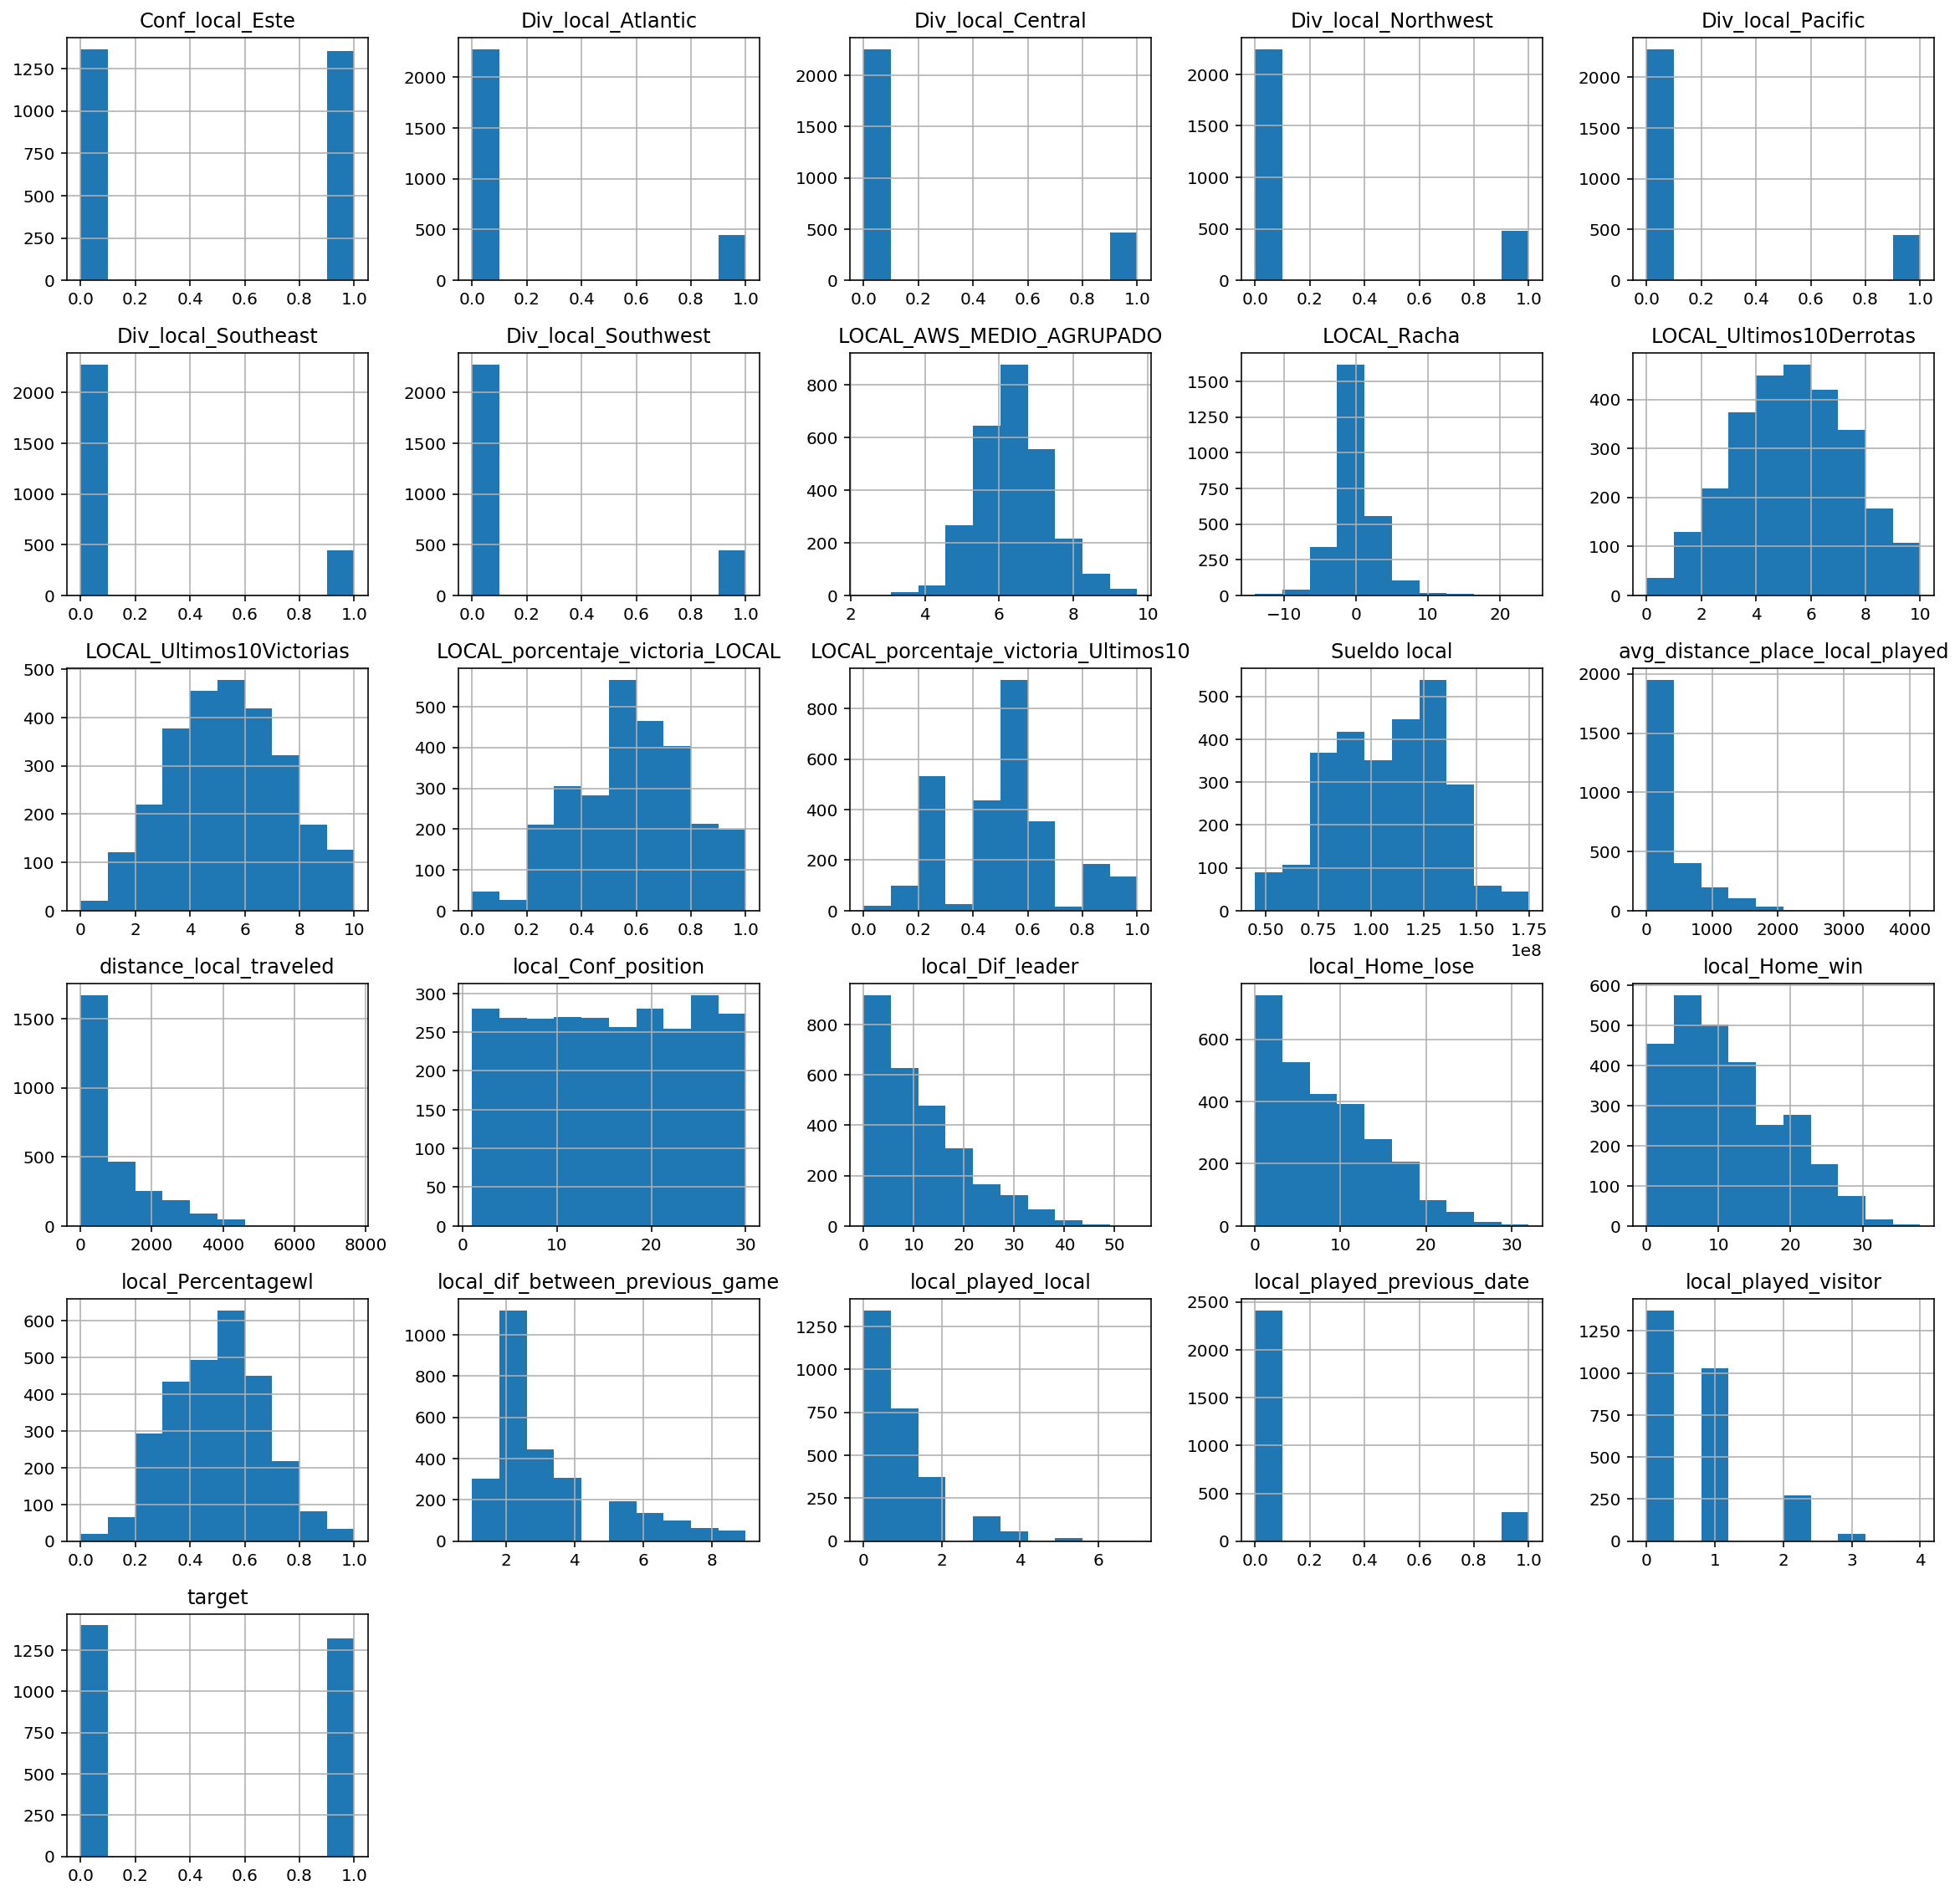

In [13]:
prev_data_local.hist(figsize = (20, 20))
matplotlib.axes.Axes.remove

<function matplotlib.artist.Artist.remove(self)>

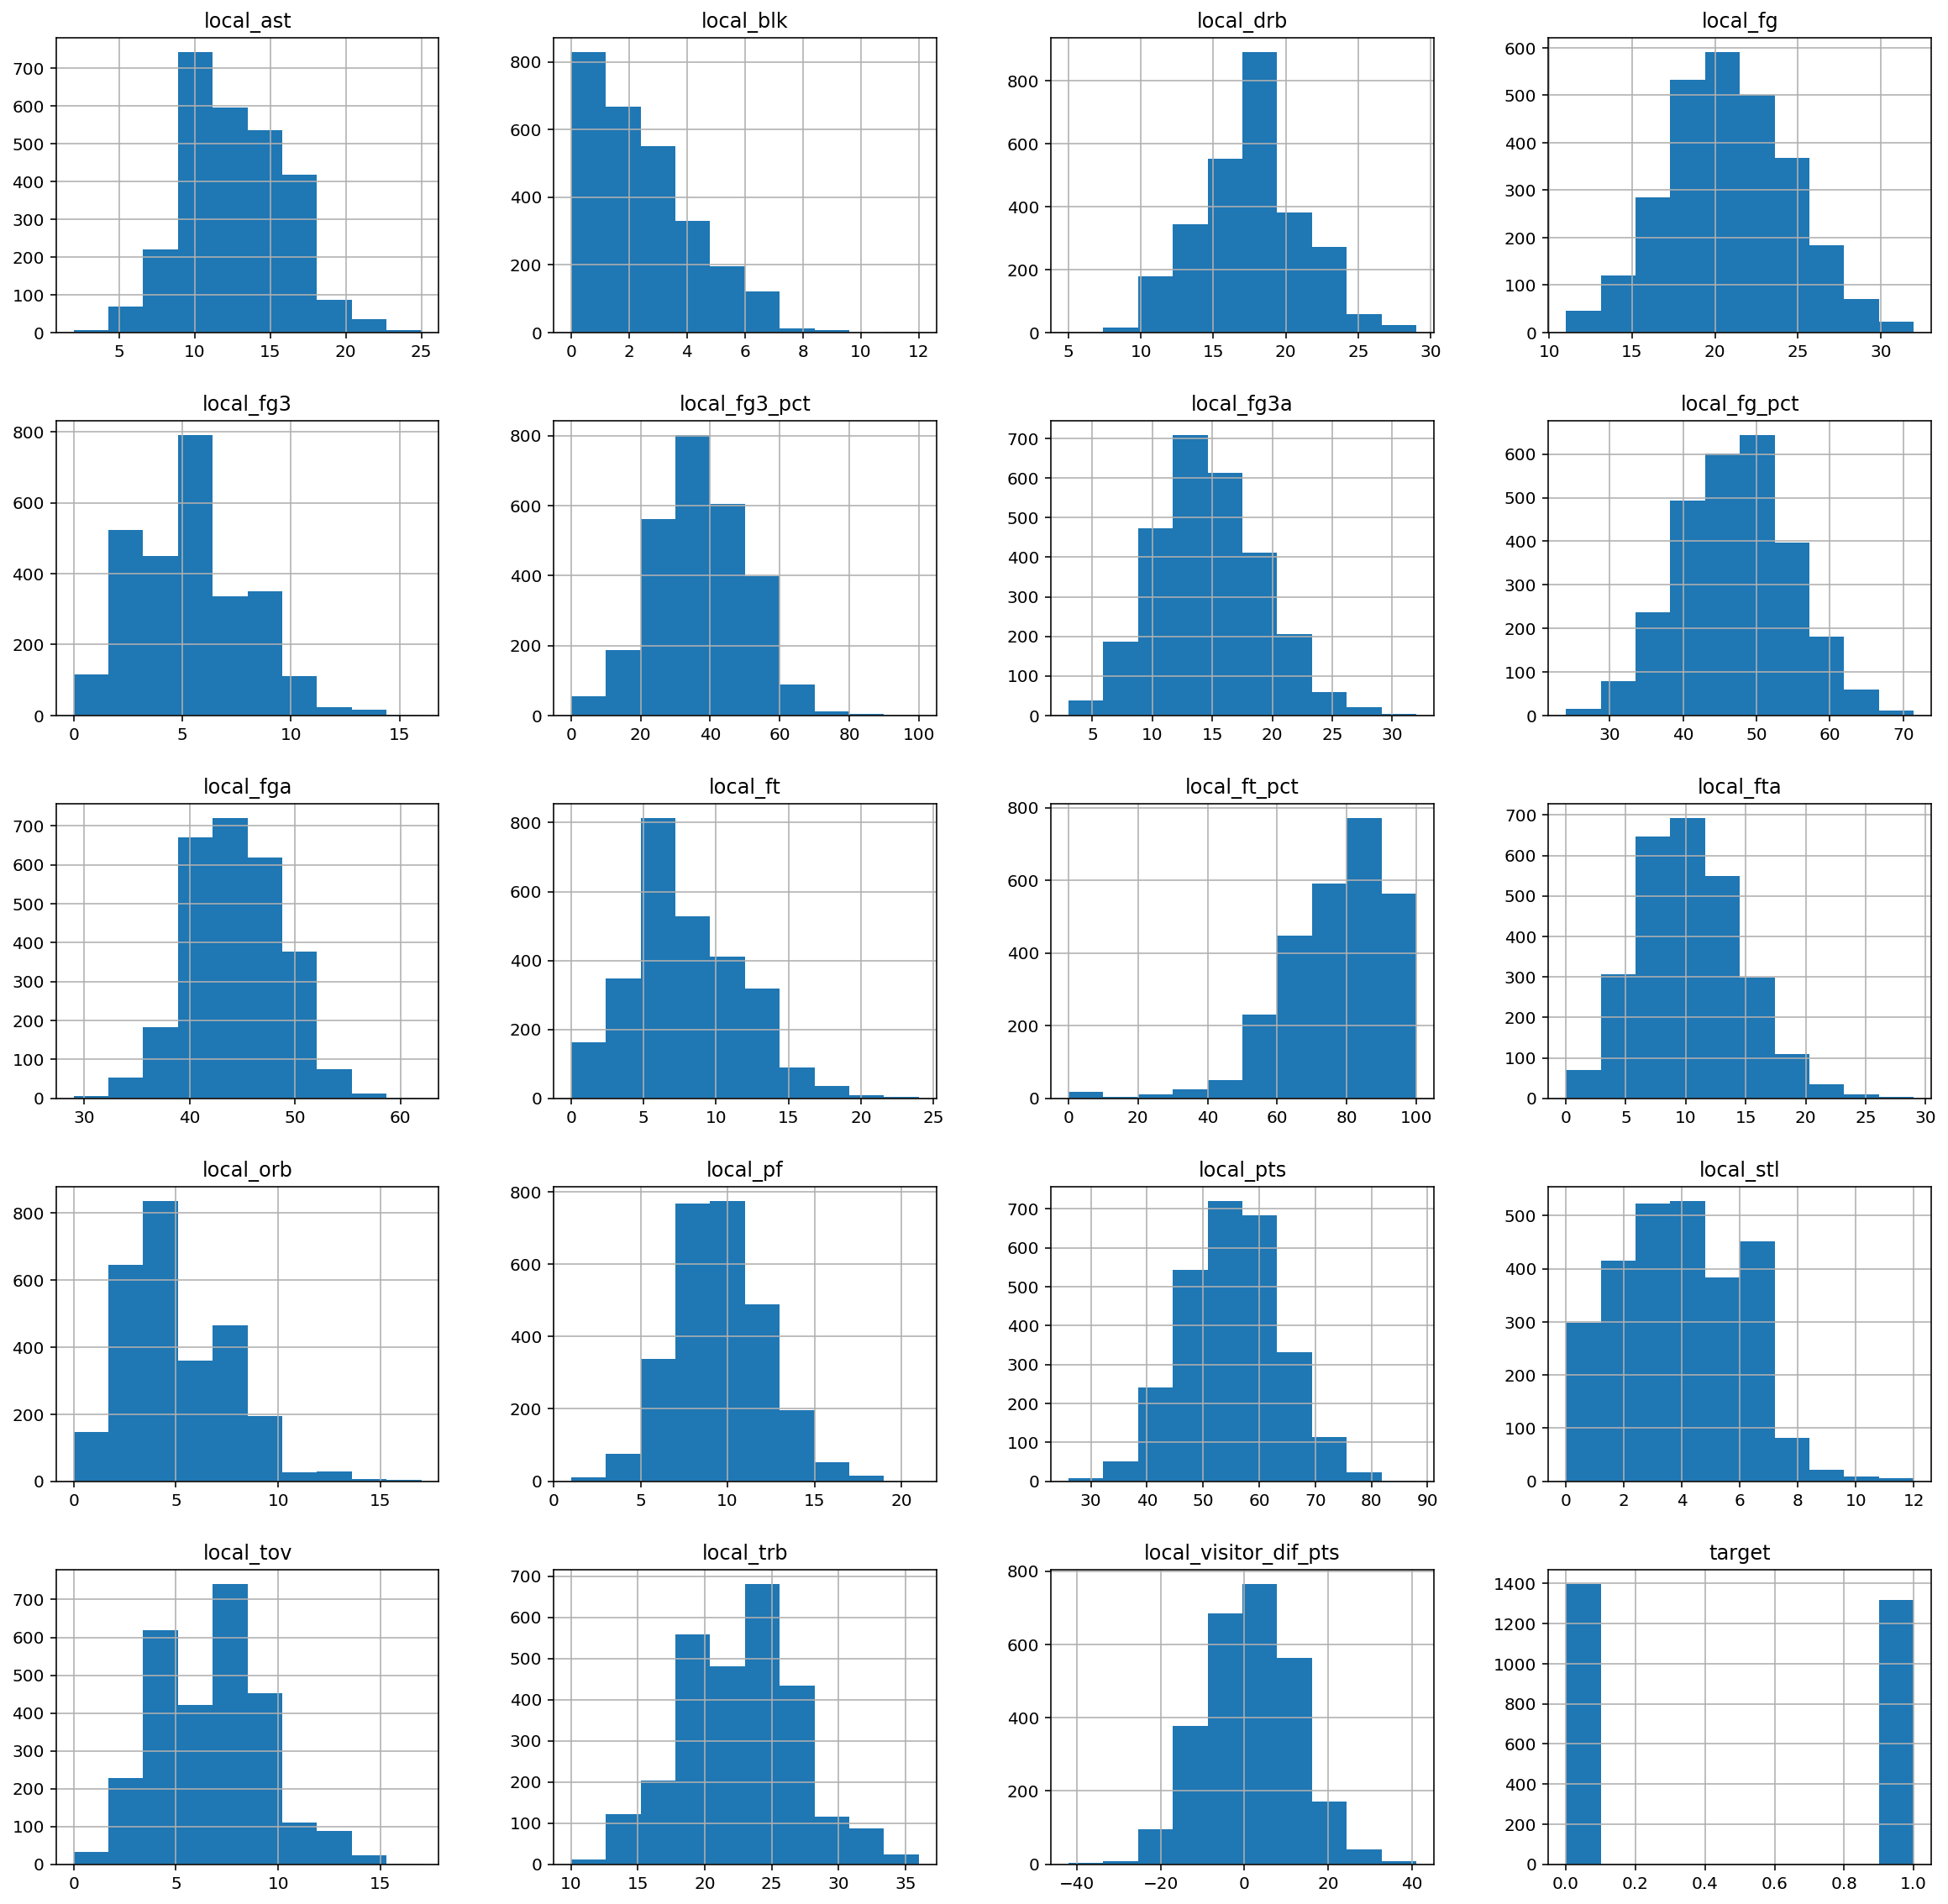

In [14]:
game_data_local.hist(figsize = (20, 20))
matplotlib.axes.Axes.remove

Text(0.5, 1.0, 'Matriz de Correlación Previo al Partido LOCAL')

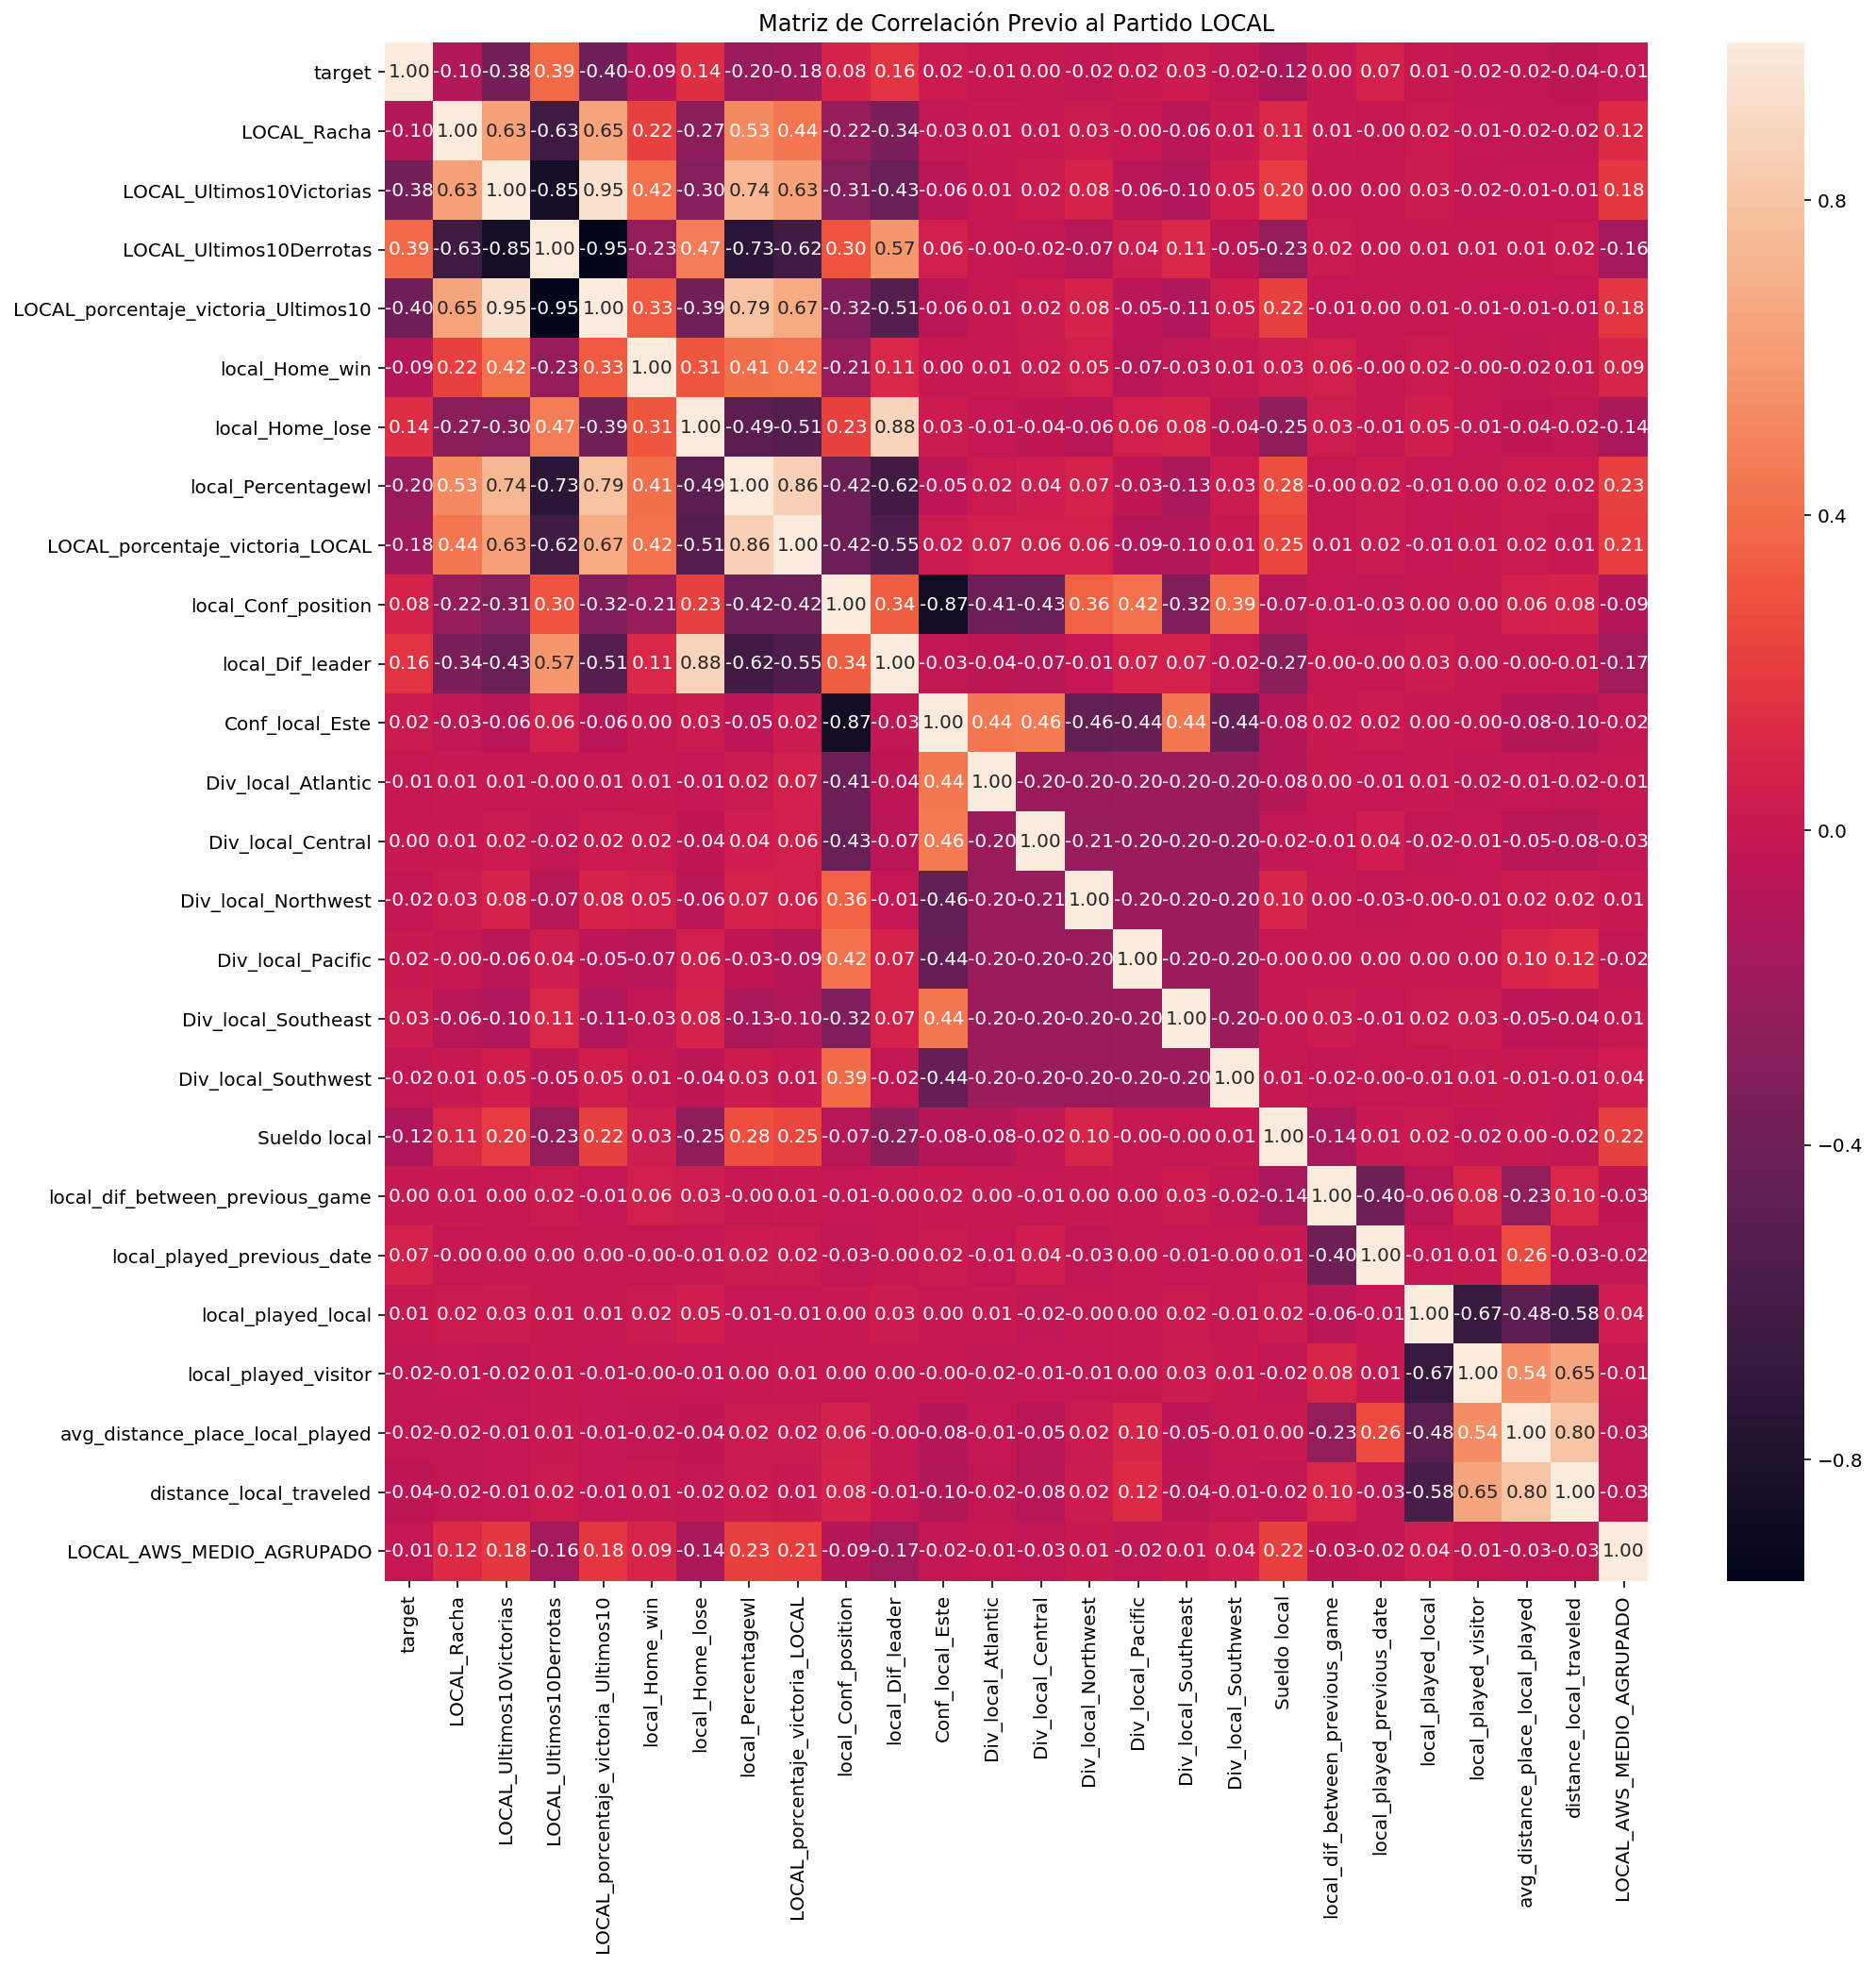

In [15]:
# Heatmap PREV LOCAL
import seaborn as sns
plt.figure(figsize=(15, 15))
sns = sns.heatmap(prev_data_local.corr(), annot=True, fmt='.2f')
sns.set_title('Matriz de Correlación Previo al Partido LOCAL')

Text(0.5, 1.0, 'Matriz de Correlación Previo al Partido VISITANTE')

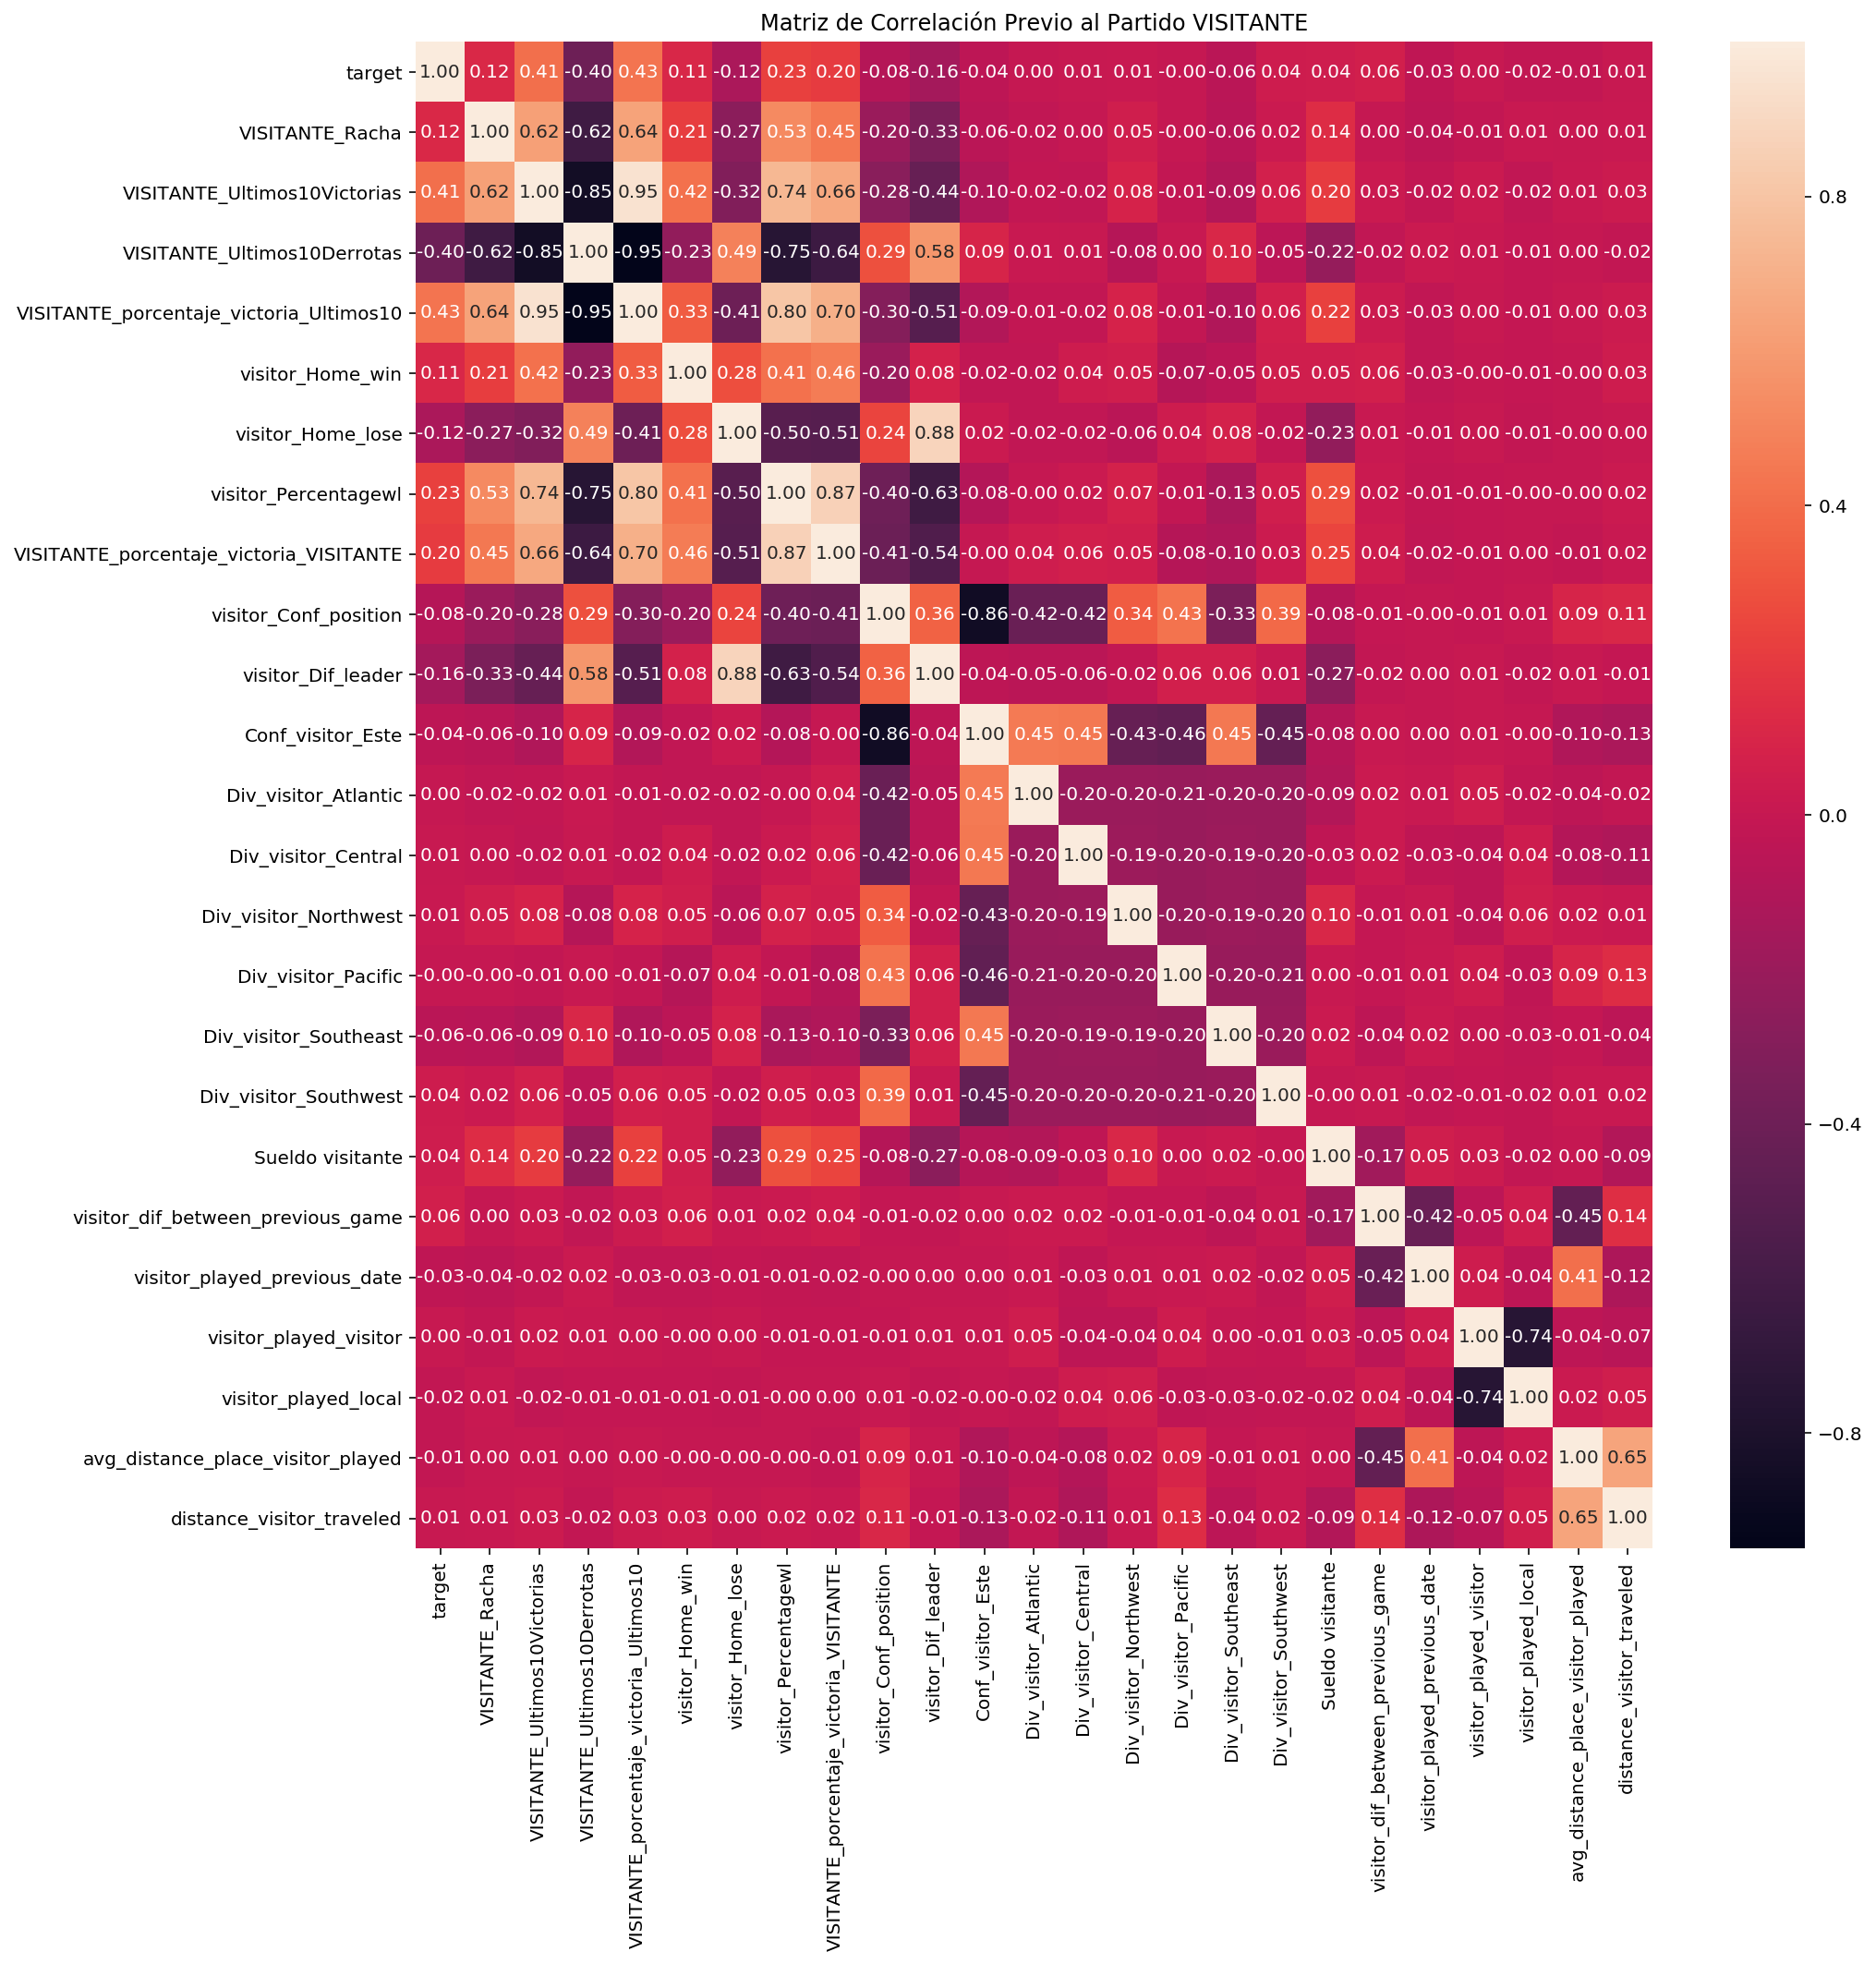

In [16]:
# Heatmap PREV VISITANTE
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_2 = sns.heatmap(prev_data_visitante.corr(), annot=True, fmt='.2f')
sns_2.set_title('Matriz de Correlación Previo al Partido VISITANTE')

Text(0.5, 1.0, 'Matriz de Correlación Durante el Partido LOCAL')

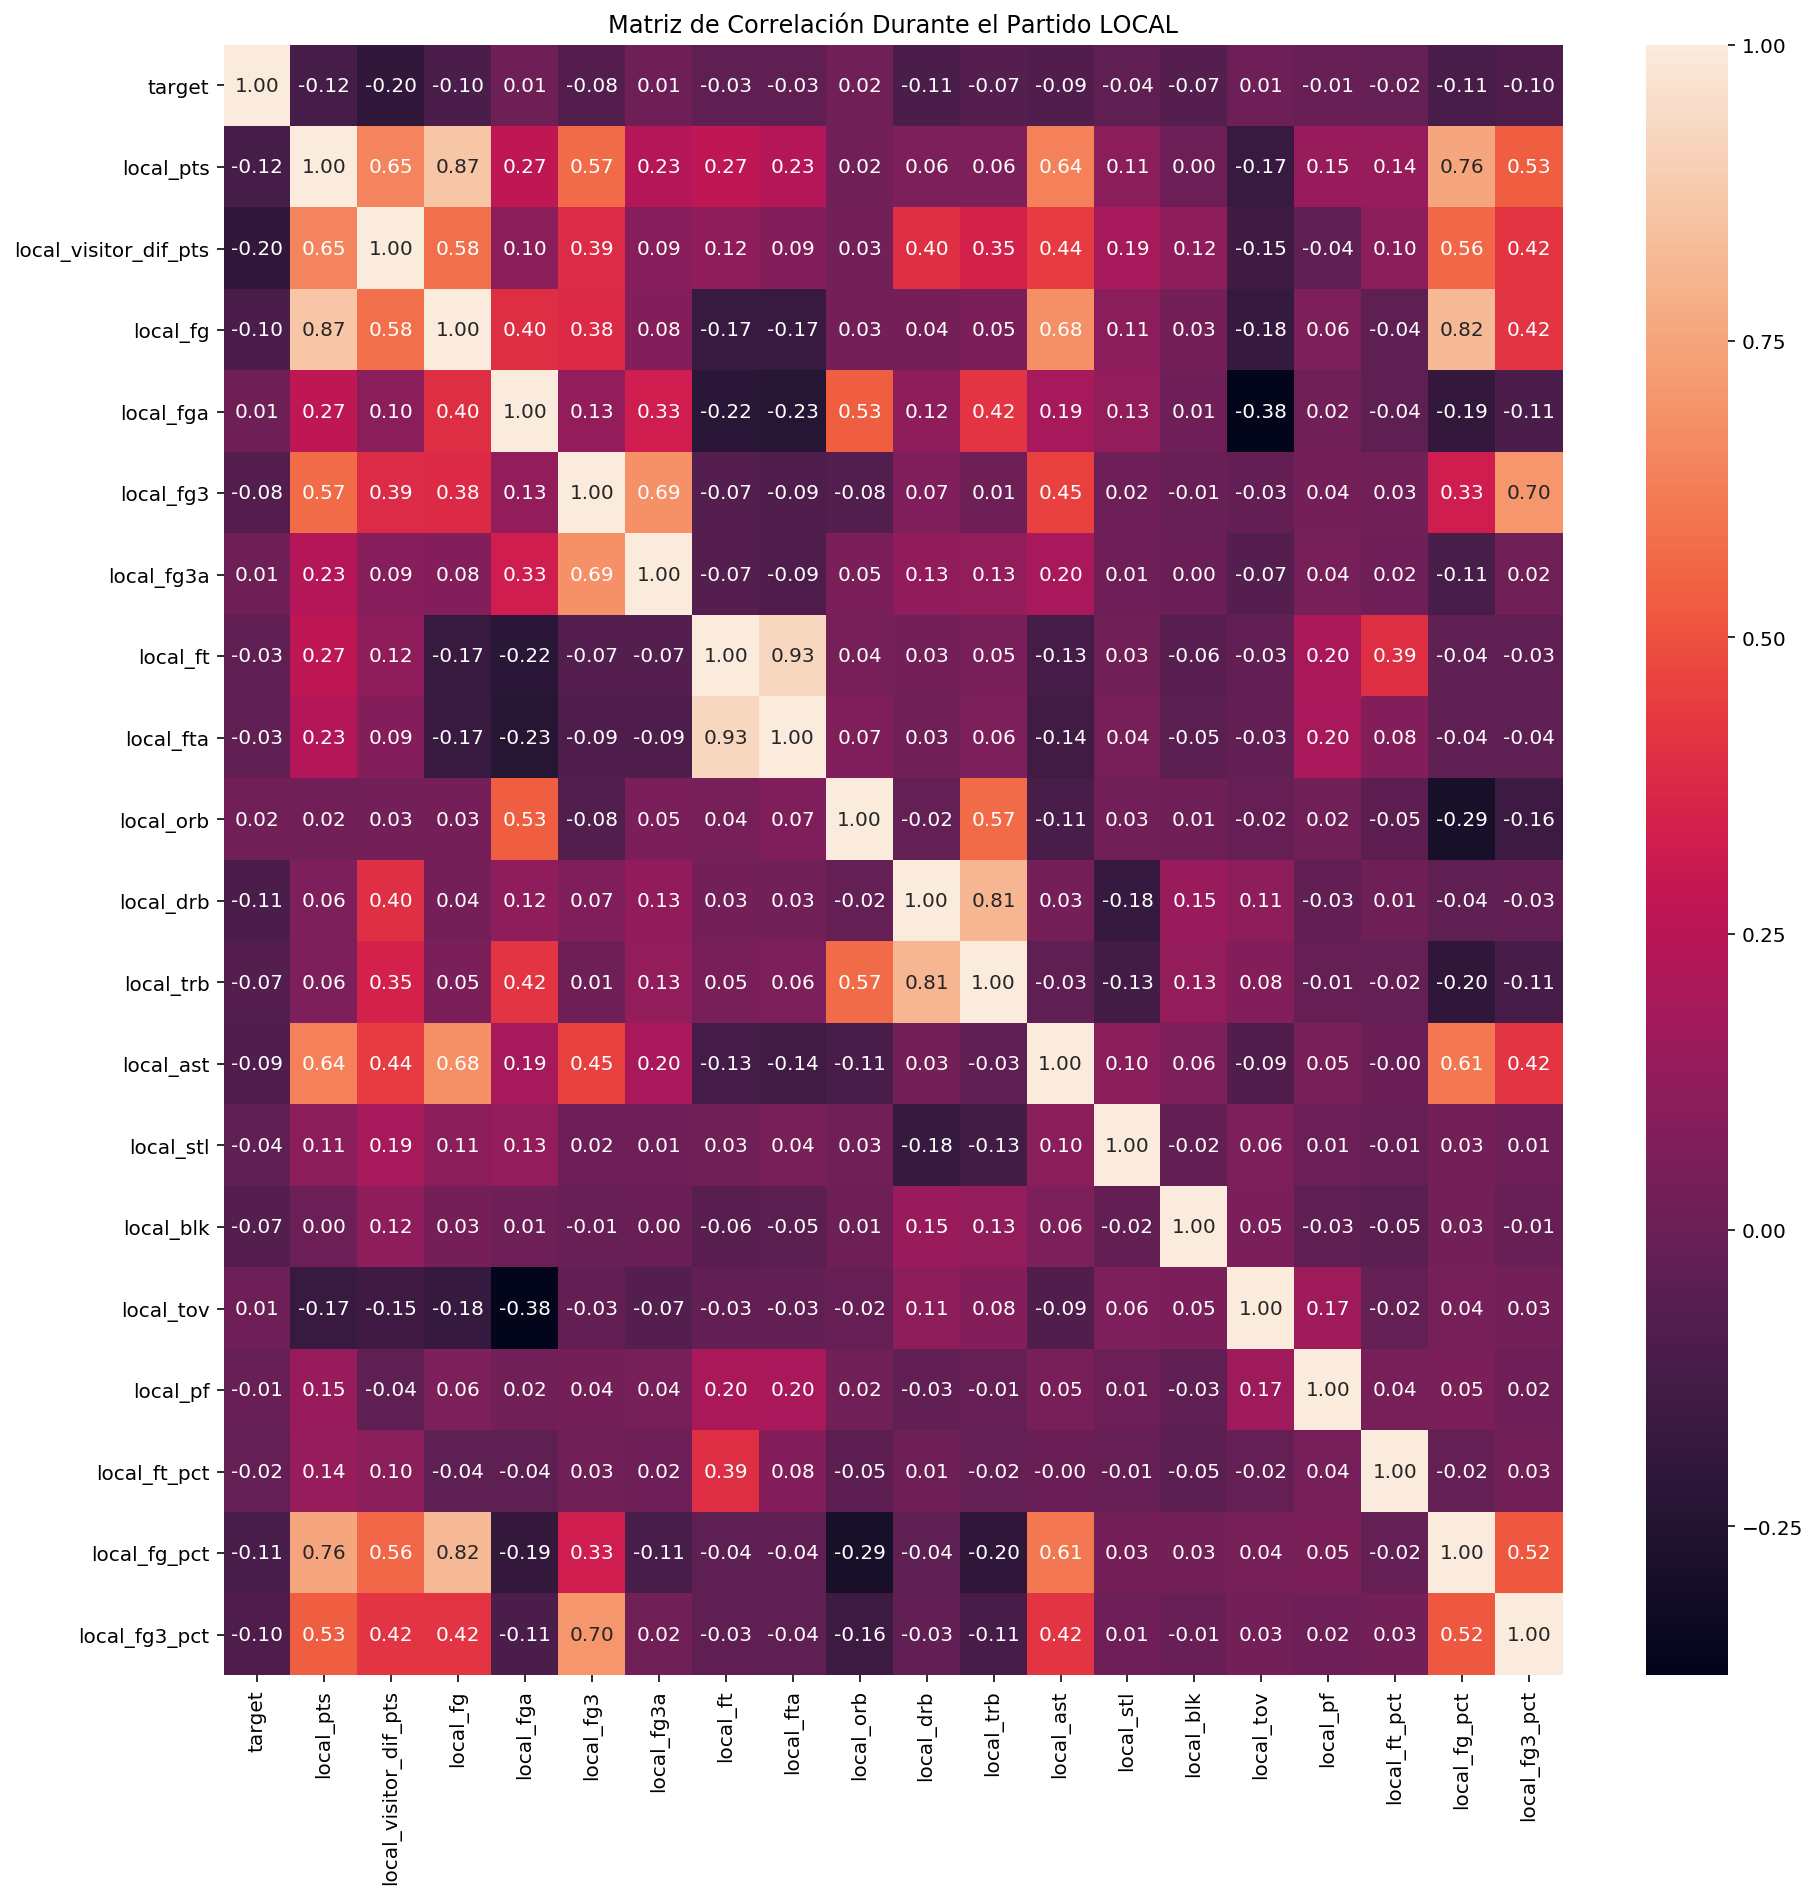

In [17]:
# Heatmap GAME LOCAL
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_3 = sns.heatmap(game_data_local.corr(), annot=True, fmt='.2f')
sns_3.set_title('Matriz de Correlación Durante el Partido LOCAL')

Text(0.5, 1.0, 'Matriz de Correlación Durante el Partido VISITANTE')

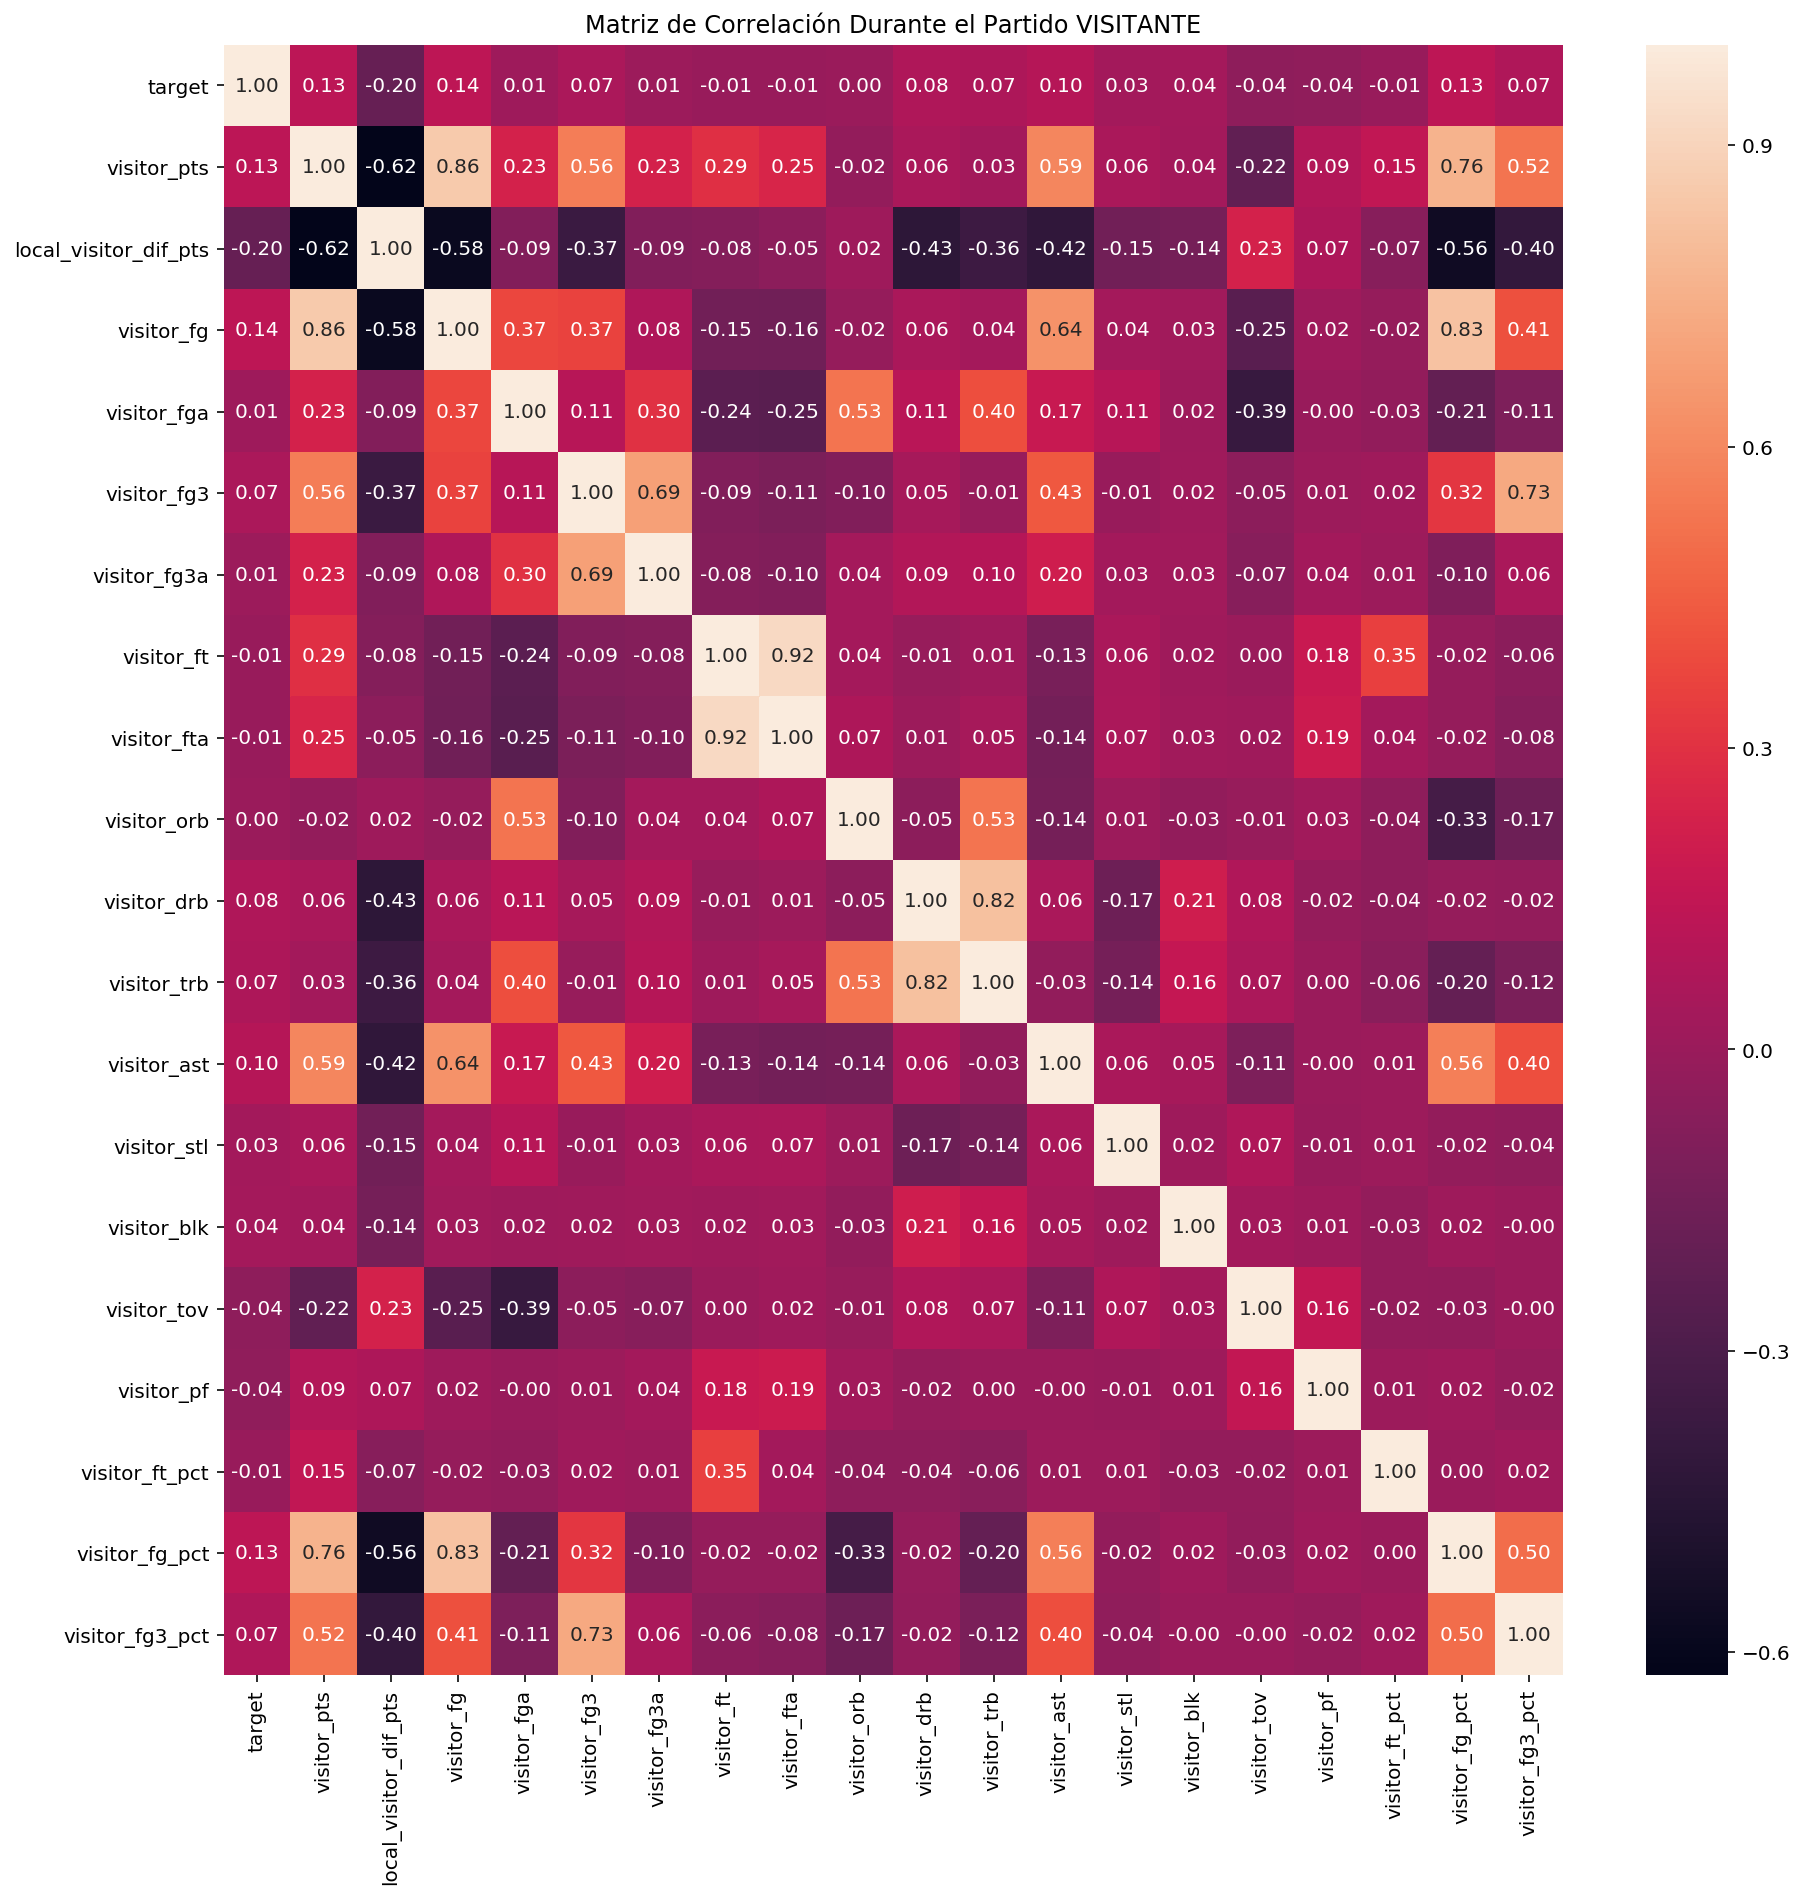

In [18]:
# Heatmap GAME VISITANTE
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_3 = sns.heatmap(game_data_visitante.corr(), annot=True, fmt='.2f')
sns_3.set_title('Matriz de Correlación Durante el Partido VISITANTE')

## Analisis de Matriz de Correlación

### Importante:

El descarte de variables por escasez de correlación o por multicolinealidad solo tiene sentido si se va a plantear un modelo sustentado en estimaciones lineales, de lo contrario la exclusión de estas contribuye al deteriodo del funcionamiento de otros modelos, por ejemplo, cualquiera derivado de "árboles de decisión".

El principal argumento es que la medida de dependencia entre variables no necesariamente es lineal, y de ser lineal, los algoritmos basados en árboles de decisión dividen entre sus funciones lógicas de decisión las variables que son perfectamente correlacionadas.


----------------------------------------------------------------------------------------------------------------------

Sobre la variable **target** descartamos las siguientes variables:

**LOCAL_porcentajeVictorias** y escogemos LOCAL_porcentaje_victoria_LOCAL dado que esta tiene mayor nivel de correlación con la variable Target, y no se escogen ambas porque estas estan muy correlacionadas entre si (.86)

**LOCAL_Posicion_division** y escogemos LOCAL_Posicion dado que esta tiene mayor nivel de correlación con la variable Target, y no se escogen ambas porque estas estan muy correlacionadas entre si (.83)

**LOCAL_Posicion_conferencia** y escogemos LOCAL_Posicion dado que esta tiene mayor nivel de correlación con la variable Target, y no se escogen ambas porque estas estan muy correlacionadas entre si (.97)

**Conf_local_west** y escogemos Conf_local_east por la inversa correlación perfecta que existe entre estas. No tiene sentido contemplar ambas ya que una contiene la información de la otra cuando toma valor cero.

Si existe la posibilidad de descartar otra variable porque pueda generar ruido en el modelo sería **LOCAL_Racha** pero dejemos esta variable mientras tanto.

In [19]:
partidos = data[all_variables]

In [ ]:
#partidos.dtypes

## Selección de Variables por Factor de Inflación de la Varianza (VIF)

La existencia de multicolinealidad --explicación de variables independientes entre si mediante una combinación lineal de otras variables independientes-- es un problema grave en cualquier método estadístico que tenga como objetivo la predicción de una variable. Una de las técnicas que se puede utilizar para identificar este problema es el VIF.

**El objetivo principal es eliminar aquellas variables que se explican entre si.**

Vamos a calcular el valor del VIF para todas las variables menos la objetivo. Para esto se realiza una regresión lineal de cada una de las variables frente al resto y aplicamos la fórmula del VIF
$$
    VIF_i = \frac{1}{1 - R_i^2}
$$
El valor del VIF se encuentra acotado ente 1 (no existe multicolinealidad) e infinito (existe una multicolinealidad perfecta). Es habitual eliminar las características con un valor por encima de 5, aunque dependiendo del número de características se puede relajar este criterio.

---------------------------------------------------------------------------------------------------------------------


Esta funcion no es mas que la iteración de una regresión lineal de cada variable respecto a otra.

Al ser siempre una regresión simple, el coeficiente de determinacion (R-square) es simplemente el cuadrado del coeficiente de correlación de Pearson.

En este contexto (para lo que nos interesa) mientras más cercano a 1 mejor, porque quiere decir que menos correlación tiene una variable respecto a la otra.


Excluimos las variables que tengan VIF mayor a 5 porque son aquellas que tienen un R-square mayor a 0,8

In [20]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        if model.score(data[x_features], data[y_featue]) == 1:
            result[y_featue] = Infinity
        else:
            result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result


calculateVIF(partidos.loc[:,partidos.columns != 'target']) # Excluimos la variale de estuido

,local_pts,local_visitor_dif_pts,local_fg,local_fga,local_fg3,local_fg3a,local_ft,local_fta,local_orb,local_drb,...,Div_visitor_Pacific,Div_visitor_Southeast,Div_visitor_Southwest,Sueldo visitante,visitor_dif_between_previous_game,visitor_played_previous_date,visitor_played_visitor,visitor_played_local,avg_distance_place_visitor_played,distance_visitor_traveled
VIF,inf,inf,inf,48.434345,3.336000e+14,10.079793,inf,23.865279,inf,inf,...,inf,inf,inf,1.730375,2.301011,1.802019,2.350906,2.324957,5.214946,4.047798


Como la funcion anterior da salida a cada una de las variables con su VIF correspondiente, ahora construimos una funcion para la exclusión de aquellas con VIF mayor a 5. 

**La salida de esta funcion es una lista de variables**

In [21]:
def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.values.max() > max_VIF:
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        print('Se ha eliminado: ----- '+ str(features[col_max]) + " ----- VIF:  " + 
              str(VIF[features[col_max]].values))
        
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

variables_vif = list(calculateVIF(selectDataUsingVIF(partidos.loc[:,partidos.columns != 'target'], 5)).columns)
# Evaluar algun cambio en el código ya que se observa un error

Se ha eliminado: ----- local_visitor_dif_pts ----- VIF:  [inf]
Se ha eliminado: ----- local_fg ----- VIF:  [inf]
Se ha eliminado: ----- local_drb ----- VIF:  [inf]
Se ha eliminado: ----- visitor_fg ----- VIF:  [9.00719925e+15]
Se ha eliminado: ----- visitor_drb ----- VIF:  [4.50359963e+15]
Se ha eliminado: ----- Div_local_Atlantic ----- VIF:  [inf]
Se ha eliminado: ----- Div_local_Central ----- VIF:  [inf]
Se ha eliminado: ----- Div_visitor_Atlantic ----- VIF:  [inf]
Se ha eliminado: ----- Div_visitor_Central ----- VIF:  [inf]
Se ha eliminado: ----- visitor_fga ----- VIF:  [50.02578943]
Se ha eliminado: ----- local_fga ----- VIF:  [48.38110569]
Se ha eliminado: ----- LOCAL_porcentaje_victoria_Ultimos10 ----- VIF:  [83.93165119]
Se ha eliminado: ----- visitor_Home_win ----- VIF:  [19.71873505]
Se ha eliminado: ----- LOCAL_porcentaje_victoria_Ultimos10 ----- VIF:  [58.01513585]
Se ha eliminado: ----- local_Dif_leader ----- VIF:  [8.41635895]
Se ha eliminado: ----- visitor_Dif_leader ----

El paso anterior esta pendiente de evaluación, solo se ha dejado para tener el código listo para ejecución



## Ajustes de tipos de variables

In [ ]:
#partidos['fecha'] = pd.to_datetime(partidos['fecha'].astype(str), format='%Y%m%d')
#partidos.dtypes

---------------------------------------------------------------------------------------------------------------------

## TEMPORADA 2017-2018
temporada_2017_2018 = data_1_clean[data_1_clean['fecha'] >= '2017-09-01']
temporada_2017_2018 = temporada_2017_2018[temporada_2017_2018['fecha'] <= '2018-04-11'].sort_values('fecha')

temporada_2017_2018 = temporada_2017_2018.reset_index(drop=True)


temporada_2017_2018.head(5)

## TEMPORADA 2018-2019
temporada_2018_2019 = data_1_clean[data_1_clean['fecha'] >= '2018-09-01']
temporada_2018_2019 = temporada_2018_2019[temporada_2018_2019['fecha'] <= '2019-04-10'].sort_values('fecha')

temporada_2018_2019 = temporada_2018_2019.reset_index(drop=True)


temporada_2018_2019.head(5)

---------------------------------------------------------------------------------------------------------------------

# Parte II: Selección de modelos.

## Entrenamiento y Test inicial

#### Logistic Regression
#### Random Forest Classifier

Antes de comenzar con la creación del modelo es necesario separar la muestra para el entrenamiento y test.

Para el correcto funcionamiento de las funciones creadas en este apartado y que sea posible la comparación de modelos es estrictamente necesario que los datos de test y entrenamientos tengan el mismo tamaño.

Sabemos que este no es el mejor enfoque, pero es el más sencillo y rápido que ayudará a determinar cuales son los modelos con mejor poder de predicción en entrenamiento y test.

Es importante destacar que el **% de caida** del modelo es ajustable mediante tecnicas de preparacion de los datos, hiperparametrizacion de los modelos y otras tecnicas.

In [ ]:
# HAY QUE ELIMINAR LA SECUENCIA DE LOS DATOS POR FECHA


# un train y test del mismo tamaño para hacer la primera labor de investigacion del modelo
#variables = partidos.loc[:, partidos.columns != 'fecha'] 


#variables_2017_2018 = temporada_2017_2018.loc[:,temporada_2017_2018.columns != 'fecha']

#variables_2018_2019 = temporada_2018_2019.loc[:,temporada_2018_2019.columns != 'fecha']

In [22]:
from sklearn.model_selection import train_test_split
# variables_2017_2018, target_2017_2018 = temporada_2017_2018.iloc[:, :-1], temporada_2017_2018.iloc[:, -1:]
#variables_2018_2019, target_2018_2019 = temporada_2018_2019.iloc[:, :-1], temporada_2018_2019.iloc[:, -1:]

variables = partidos.copy()

variables, target = variables.iloc[:, :-1], variables.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.5, random_state=1) 

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1359, 86)
(1359, 86)
(1359, 1)
(1359, 1)


## PRESENCIA DE DATOS DESBALANCEADOS (¿?) PENDIENTE DE EVALUAR

### # Esto ya no parece tener sentido YO ESTABA TRABAJANDO CON UN .CSV ANTIGUO........
https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36


En teoria se deberia realizar una operacion de **Oversampling** ¿por que?:

Cuando el conjunto de datos no representa todas las clases de datos por igual, el modelo podría ajustarse en exceso a la clase que está más representada en su conjunto de datos (en nuestro caso como es de esperarse mayor wins por parte del local) y pasar por alto la existencia de la clase minoritaria (los loses del local).

En este contexto, de forma exagerada, imaginemos que nuestro modelo siempre estima win para local, dado los datos, sobre la totalidad de resultados igual a 1 tendrá un accuracy aprox. igual a 59%.


In [24]:
partidos.target.value_counts() 

0    1399
1    1319
Name: target, dtype: int64

## Cómo evaluar correctamente un modelo desbalanceado:

### Falta investigar

https://en.wikipedia.org/wiki/Precision_and_recall 

Hay que evaluar si se realiza el oversampling o no. De no realizarse, es importante las métricas de evaluación del modelo:

#####  colocar formula con latex

El **accuracy** puede ser una métrica engañosa para conjuntos de datos desequilibrados. Considere una muestra con 95 valores negativos y 5 positivos. La clasificación de todos los valores como negativos en este caso da un puntaje de precisión de 0.95. Hay muchas métricas que no sufren este problema. 

Por ejemplo, la precisión equilibrada (bACC) normaliza las predicciones verdaderas positivas y negativas verdaderas por el número de muestras positivas y negativas, respectivamente, y divide su suma entre dos:


##### colocar formula con latex

Para el ejemplo anterior (95 muestras negativas y 5 positivas), clasificarlas todas como negativas da un puntaje de precisión equilibrado de 0,5 (el puntaje máximo de bACC es uno), que es equivalente al valor esperado de una suposición aleatoria en un conjunto de datos equilibrado. La precisión equilibrada puede servir como una medida de rendimiento general para un modelo, ya sea que las etiquetas verdaderas estén o no desequilibradas en los datos, suponiendo que el costo de FN (falso negativo) sea el mismo que FP (falso positivo).


## Función de Gini

In [25]:
from sklearn.metrics import roc_auc_score

def GS(a,b):
    """""
    Función que recibe dos parámetros;
    :a: una variable binaria que representa 0 = bueno y 1 = malo (objetivo)
    :b: predicción de la primera variable (continua, entera o binaria)
    :return: coeficiente GINI de las dos variables anteriores. """
    
    gini = 2*roc_auc_score(a,b)-1
    return gini

## Funcion de entranamiento de algoritmos

In [26]:
def train_method(x_train, y_train, x_test, y_test, method):  
    """
    Funcion para entrenar un modelo con el método seleccionado
    El entrenamiento y algoritmos son de la libreria de sklearn.
    :param x_train: numpy array, required
    :param y_train: numpy array, required
    :param x_test: numpy array, required
    :param y_test: numpy array, required    
    :return: object
        - Modelo entrenado según los datos
    """    
    if method == 'LR':  # Linear Regresssion
        return LR(x_train, y_train, x_test, y_test)
    
    elif method == 'LOGR': # Logistic Regresssion
        return LOGR(x_train, y_train, x_test, y_test)

    elif method == 'DT': # Decision Tree Classifier
        return DT(x_train, y_train, x_test, y_test)    
    
    elif method == 'LASSO': # Lasso Regresssion 
        return LASSO(x_train, y_train, x_test, y_test)
    
    elif method == 'RIDGE': # Ridge Regresssion
        return RIDGE(x_train, y_train, x_test, y_test)
    
    elif method == 'RFR': # Random Forest Regressor
        return RFR(x_train, y_train, x_test, y_test)

    elif method == 'RFC': # Random Forest Classifier
        return RFC(x_train, y_train, x_test, y_test)    

    elif method == 'GBR': # Gradient Boosting Regression
        return GBR(x_train, y_train, x_test, y_test)

## Funciones resumen de algoritmos

In [27]:
from sklearn.linear_model import LinearRegression
def LR(X_train, y_train, X_test, y_test):
    """
    Linear Regresssion
    """
    model = LinearRegression().fit(X_train, y_train)
    return prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test)

from sklearn.linear_model.logistic import LogisticRegression
def LOGR(X_train, y_train, X_test, y_test):
    """
    Logistic Regresssion
    """
    model = LogisticRegression().fit(X_train, y_train)
    return prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test)


from sklearn.tree import DecisionTreeClassifier
def DT(X_train, y_train, X_test, y_test):
    """
    Decision Tree Classifier
    """
    model = DecisionTreeClassifier(min_samples_split=20, random_state=99).fit(X_train, y_train)
    return prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test)


from sklearn.linear_model import Lasso
def LASSO(X_train, y_train, X_test, y_test):
    """
    Lasso Regresssion
    """
    model = Lasso(alpha = 0.01).fit(X_train, y_train)
    return prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test)

from sklearn.linear_model import Ridge
def RIDGE(X_train, y_train, X_test, y_test):
    """
    Ridge Regresssion
    """
    model = Ridge(alpha = 0.01).fit(X_train, y_train)
    return prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test)

from sklearn.ensemble import RandomForestRegressor
def RFR(X_train, y_train, X_test, y_test):
    """
    Random Forest Regressor
    """
    model = RandomForestRegressor(n_estimators=1000, min_samples_split=2).fit(X_train, y_train)
    return prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test)


from sklearn.ensemble import RandomForestClassifier
def RFC(X_train, y_train, X_test, y_test):
    """
    Random Forest Classifier
    """
    model = RandomForestClassifier(n_estimators=1000, min_samples_split=2).fit(X_train, y_train)
    return prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test)

from sklearn.ensemble import GradientBoostingRegressor
def GBR(X_train, y_train, X_test, y_test):
    """
    Gradient Boosting Regression
    """
    model = GradientBoostingRegressor(n_estimators=1000,alpha=0.01).fit(X_train, y_train)
    return prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test)

## Función de entrenamiento de modelos

In [28]:
def prepare_dictionary_of_measures(model, X_train, y_train, X_test, y_test):
    # MEDIDAS DE PRUEBA
    try: # Si es un método de clasificación, usamos la probabilidad.
        y_pred_train = model.predict_proba(X_train)[:,1]
    except:
        y_pred_train = model.predict(X_test)
        
    a_train = model.score(X_train, y_train)
    gini_train = GS(y_test,y_pred_train)    

    # MEDIDAS DE TEST
    try: # Si es un método de clasificación, usamos la probabilidad.
        y_pred_test = model.predict_proba(X_test)[:,1]
    except:
        y_pred_test = model.predict(X_test) 
        
    a_test = model.score(X_test, y_test)
    gini_test = GS(y_test,y_pred_test)    

    return {'model':model,'accuracy_train':a_train,'accuracy_test':a_test,
            'gini_train':gini_train,'gini_test':gini_test}

In [29]:
dict_trained_model = train_method(x_train, y_train,x_test,y_test,"LR")
print(dict_trained_model)

{'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), 'accuracy_train': 0.4368218962736321, 'accuracy_test': 0.3919549384355354, 'gini_train': 0.7497793065660101, 'gini_test': 0.7497793065660101}


## Dataframe de comparación de modelos (Gini)

In [30]:
method_list = ['LR','LASSO', 'DT', 'LOGR','RIDGE','RFR','RFC','GBR']
df_result_summary = pd.DataFrame(index=method_list,columns=['GINI-train','GINI-test', 'Caida %'])

In [31]:
C1 = []
C2 = []
C3 = []
for method in method_list:
    dict_trained_model[method] = train_method(x_train, y_train,x_test,y_test,method)
    # Predicciones - REGRESSIONS
    if method in ['LR','LASSO','RIDGE','RFR','GBR']: 
        y_pred_train = dict_trained_model[method]['model'].predict(x_train)
        y_pred_test = dict_trained_model[method]['model'].predict(x_test)
    else: # Predicciones - CLASSIFIERS 
        y_pred_train = dict_trained_model[method]['model'].predict_proba(x_train)[:,1]
        y_pred_test = dict_trained_model[method]['model'].predict_proba(x_test)[:,1]
    # Calculo de GINI
    gini_score_train = GS(y_train,y_pred_train)
    C1.append(gini_score_train)
    gini_score_test = GS(y_test,y_pred_test)
    C2.append(gini_score_test)
    
    diferencia = (1-(gini_score_test/gini_score_train)) * 100
    C3.append(diferencia)
    
    
# Adding the results to: df_result_summary
df_result_summary ['GINI-train'] = C1
df_result_summary ['GINI-test'] = C2
df_result_summary ['Caida %'] = C3

# Printing out the summary table
df_result_summary.sort_values('GINI-test', ascending=False)

,GINI-train,GINI-test,Caida %
LR,0.784503,0.749779,4.426198
RIDGE,0.784451,0.749701,4.429843
LASSO,0.736815,0.728132,1.178538
GBR,1.000000,0.658906,34.109420
RFC,1.000000,0.650928,34.907178
RFR,1.000000,0.620596,37.940354
DT,0.934875,0.414943,55.615171
LOGR,0.166930,0.214066,-28.236914


## Dataframe de comparación de modelos (Accuracy)

#### Accuracy (exactitud)
La exactitud es una métrica para evaluar modelos de resultados de clasificación. 

Informalmente, la exactitud es la fracción de predicciones que el modelo realizó correctamente.

Formalmente, la exactitud tiene la siguiente definición:

##### Colocar formula con Latex

Donde VP = Verdaderos positivos, VN = Verdaderos negativos, FP = Falsos positivos y FN = Falsos negativos

In [32]:
data = []
for method in method_list:
    dict_trained_model[method] = train_method(x_train, y_train,x_test,y_test,method)
#    print (dict_trained_model[method])
    data.append([method, dict_trained_model[method]['accuracy_train'], dict_trained_model[method]['accuracy_test']])

df_result_summary_2 = pd.DataFrame(data,columns=['method','accuracy_train','accuracy_test']) 
                
df_result_summary_2.sort_values('accuracy_test', ascending = False)

,method,accuracy_train,accuracy_test
6,RFC,1.000000,0.749816
2,DT,0.889625,0.640177
3,LOGR,0.559971,0.578366
4,RIDGE,0.436820,0.391960
0,LR,0.436822,0.391955
1,LASSO,0.386762,0.375973
7,GBR,0.986127,0.297564
5,RFR,0.901676,0.281969


# Anexo:

In [ ]:
classifier_list = """{"svm_linear": SVC(probability=True, kernel='linear', C=1.0),
                       "svm_poly": SVC(probability=True, kernel='poly', C=1.0),
                       "svm_rbf": SVC(probability=True, kernel='rbf', C=1.0, gamma=0.01),
                       "linear_svc": LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.1, C=1.0, multi_class='ovr', fit_intercept=True,
                                               intercept_scaling=1, random_state=None, max_iter=3000),
                       "knn": KNeighborsClassifier(n_neighbors=100, weights='distance', leaf_size=30, n_jobs=n_jobs),
                       "random_forests": RandomForestClassifier(n_estimators=350, criterion='entropy', min_samples_split=2,
                                                                min_samples_leaf=1, max_leaf_nodes=600, n_jobs=n_jobs),
                       "logistic_regression": LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=2.4, fit_intercept=True, intercept_scaling=1,
                                                                 random_state=None, solver='liblinear', max_iter=1000, multi_class='ovr',
                                                                 warm_start=False, n_jobs=n_jobs),
                       "decision_trees": DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                                                min_samples_leaf=100, min_weight_fraction_leaf=0.0, max_features=None,
                                                                random_state=None, max_leaf_nodes=None, presort=False),
                       "sgd": SGDClassifier(alpha=.0001, n_iter=500, penalty="elasticnet", n_jobs=n_jobs),
                       "neural_network": Classifier(layers=[Layer("Sigmoid", units=14), Layer("Sigmoid", units=13), Layer("Sigmoid", units=12),
                                                            Layer("Sigmoid", units=10), Layer("Softmax")], learning_rate=0.01, n_iter=200,
                                                    batch_size=10, regularize='L1', n_stable=50, dropout_rate=0, verbose=True),
                       "GBC": GradientBoostingClassifier(max_depth=10, max_leaf_nodes=850, min_samples_leaf=15, learning_rate=0.1),
                       "XGB": XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                                            max_depth=10, min_child_weight=2, missing=None, n_estimators=100, nthread=n_jobs, reg_alpha=0,
                                            objective='binary:logistic', reg_lambda=1, scale_pos_weight=1, seed=0, silent=True, subsample=1)}"""


# Random Forest Classifier

## Selección de Variables con RF

In [33]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


list_var = list(set(variables.columns))

print ("FEATURE IMPORTANCE Random Forest Classifier")
print("")

       
forest = RandomForestClassifier()

forest.fit(variables, target) # Este paso es importante: la selección es respecto a la totalidad de los datos

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Ranking
for f in range(len(variables.columns)):
    print("%d. %s (%f) " % (f + 1, list_var[indices[f]], importances[indices[f]]))

FEATURE IMPORTANCE Random Forest Classifier

1. local_drb (0.057484) 
2. distance_local_traveled (0.049606) 
3. Sueldo local (0.048825) 
4. local_ast (0.035607) 
5. visitor_blk (0.034865) 
6. local_Home_lose (0.031787) 
7. LOCAL_porcentaje_victoria_Ultimos10 (0.024320) 
8. LOCAL_Ultimos10Derrotas (0.022403) 
9. Div_local_Central (0.020851) 
10. local_visitor_dif_pts (0.020833) 
11. visitor_Dif_leader (0.019119) 
12. Div_visitor_Southwest (0.018856) 
13. local_fg (0.018477) 
14. distance_visitor_traveled (0.017966) 
15. Div_visitor_Pacific (0.016961) 
16. VISITANTE_porcentaje_victoria_VISITANTE (0.015714) 
17. Div_visitor_Southeast (0.015040) 
18. local_dif_between_previous_game (0.014692) 
19. LOCAL_AWS_MEDIO_AGRUPADO (0.014684) 
20. Div_visitor_Central (0.014634) 
21. VISITANTE_Racha (0.014479) 
22. visitor_played_visitor (0.013956) 
23. avg_distance_place_local_played (0.013673) 
24. visitor_pf (0.012379) 
25. Div_visitor_Atlantic (0.012224) 
26. visitor_tov (0.011992) 
27. avg_dista

In [44]:
rf_variables = []
for f in range(50): # eleccion arbitraria por mi, esto luego se va probando hasta determinar el optimo...
    rf_variables.append(list_var[indices[f]])

## Selección de Variables con Algoritmo Genético (GA)

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import re
from deap import creator, base, tools, algorithms #GENETIC ALGORITHM LIBRARY - requirement: pip install deap
import random
from sklearn import metrics

In [35]:
print ("GENETIC ALGORITHM FOR FEATURE SELECTION:")

list_inputs = set(variables.columns)

#####
#SETING UP THE GENETIC ALGORITHM and CALCULATING STARTING POOL (STARTING CANDIDATE POPULATION)
#####
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(list_inputs))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

NPOPSIZE = len(variables.columns) #RANDOM STARTING POOL SIZE
population = toolbox.population(n=NPOPSIZE)

GENETIC ALGORITHM FOR FEATURE SELECTION:


In [36]:
from sklearn.metrics import roc_auc_score
#####
#ASSESSING GINI ON THE STARTING POOL
#####
dic_gini={}

for i in range(np.shape(population)[0]): 

    # TRASLATING DNA INTO LIST OF VARIABLES (1-81)
    var_model = []    
    for j in range(np.shape(population)[0]): 
        if (population[i])[j]==1:
            var_model.append(list(list_inputs)[j])

    # ASSESSING GINI INDEX FOR EACH INVIVIDUAL IN THE INITIAL POOL 

    #X_train = partidos[var_model]
    #Y_train = partidos["target"]
    
    X_train = variables.copy()
    Y_train = target.copy()

    ######
    # CHANGE_HERE - START: YOU ARE VERY LIKELY USING A DIFFERENT TECHNIQUE BY NOW. SO CHANGE TO YOURS.
    #####      

    lr = RandomForestClassifier()
    model = lr.fit(X_train, Y_train)
    Y_predict = model.predict_proba(X_train)[:,1]
    
    #yo_pred = result.predict_proba(Xo_std)[:,1] #este es para tener la prob. cuando usamos skit.learn    
    
    
    
    
    #lr = sm.Logit(Y_train, X_train)
    #model=lr.fit()   
    #Y_predict=model.predict(X_train)
    ######
    # CHANGE_HERE - END: YOU ARE VERY LIKELY USING A DIFFERENT TECHNIQUE BY NOW. SO CHANGE TO YOURS.
    #####             


    ######
    # CHANGE_HERE - START: HERE IT USES THE DEVELOPMENT GINI TO SELECT VARIABLES, YOU SHOULD A DIFFERENT GINI. EITHER THE OOT GINI OR THE SQRT(DEV_GINI*OOT_GINI)
    #####                
    fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_predict)
    auc = metrics.auc(fpr, tpr)
    
    gini_power= 2*roc_auc_score(Y_train, Y_predict)-1
    #gini_power = abs(2*auc-1)
    ######
    # CHANGE_HERE - END: HERE IT USES THE DEVELOPMENT GINI TO SELECT VARIABLES, YOU SHOULD A DIFFERENT GINI. EITHER THE OOT GINI OR THE SQRT(DEV_GINI*OOT_GINI)
    #####                
    
    gini=str(gini_power)+";"+str(population[j]).replace('[','').replace(', ','').replace(']','')
    dic_gini[gini]=population[j] 
    
list_gini=sorted(dic_gini.keys(),reverse=True)

In [37]:
#####
#GENETIC ALGORITHM MAIN LOOP - START
# - ITERATING MANY TIMES UNTIL NO IMPROVMENT HAPPENS IN ORDER TO FIND THE OPTIMAL SET OF CHARACTERISTICS (VARIABLES)
#####
sum_current_gini=0.0
sum_current_gini_1=0.0
sum_current_gini_2=0.0
first=0    
OK = 1
a=0
while OK:  #REPEAT UNTIL IT DO NOT IMPROVE, AT LEAST A LITLE, THE GINI IN 2 GENERATIONS
    a=a+1
    print ('loop ', a)
    OK=0

    ####
    # GENERATING OFFSPRING - START
    ####
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1) #CROSS-X PROBABILITY = 50%, MUTATION PROBABILITY=10%
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population =toolbox.select(offspring, k=len(population))
    ####
    # GENERATING OFFSPRING - END
    ####

    sum_current_gini_2=sum_current_gini_1
    sum_current_gini_1=sum_current_gini
    sum_current_gini=0.0

    #####
    #ASSESSING GINI ON THE OFFSPRING - START
    #####
    for j in range(np.shape(population)[0]): 
        if population[j] not in dic_gini.values(): 
            var_model = [] 
            for i in range(np.shape(population)[0]): 
                if (population[j])[i]==1:
                    var_model.append(list(list_inputs)[i])
            
            X_train= variables.copy()
            Y_train= target.copy()
            
            ######
            # CHANGE_HERE - START: YOU ARE VERY LIKELY USING A DIFFERENT TECHNIQUE BY NOW. SO CHANGE TO YOURS.
            #####    
    
            
            lr = RandomForestClassifier()
            model = lr.fit(X_train, Y_train)
            Y_predict = model.predict_proba(X_train)[:,1]
            
            ######
            # CHANGE_HERE - END: YOU ARE VERY LIKELY USING A DIFFERENT TECHNIQUE BY NOW. SO CHANGE TO YOURS.
            #####            
                       
            
            ######
            # CHANGE_HERE - START: HERE IT USES THE DEVELOPMENT GINI TO SELECT VARIABLES, YOU SHOULD A DIFFERENT GINI. EITHER THE OOT GINI OR THE SQRT(DEV_GINI*OOT_GINI)
            #####                       
            fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_predict)
            auc = metrics.auc(fpr, tpr)
            gini_power= 2*roc_auc_score(Y_train, Y_predict)-1   
            #gini_power = abs(2*auc-1)
            ######
            # CHANGE_HERE - END: HERE IT USES THE DEVELOPMENT GINI TO SELECT VARIABLES, YOU SHOULD A DIFFERENT GINI. EITHER THE OOT GINI OR THE SQRT(DEV_GINI*OOT_GINI)
            #####                       
           
            gini=str(gini_power)+";"+str(population[j]).replace('[','').replace(', ','').replace(']','')
            dic_gini[gini]=population[j]  
    #####
    #ASSESSING GINI ON THE OFFSPRING - END
    #####

    #####
    #SELECTING THE BEST FITTED AMONG ALL EVER CREATED POPULATION AND CURRENT OFFSPRING - START
    #####           
    list_gini=sorted(dic_gini.keys(),reverse=True)
    population=[]
    for i in list_gini[:NPOPSIZE]:
        population.append(dic_gini[i])
        gini=float(i.split(';')[0])
        sum_current_gini+=gini
    #####
    #SELECTING THE BEST FITTED AMONG ALL EVER CREATED POPULATION AND CURRENT OFFSPRING - END
    #####           
      
    #HAS IT IMPROVED AT LEAST A LITLE THE GINI IN THE LAST 2 GENERATIONS
    print ('sum_current_gini=', sum_current_gini, 'sum_current_gini_1=', sum_current_gini_1, 'sum_current_gini_2=', sum_current_gini_2)
    if(sum_current_gini>sum_current_gini_1+0.0001 or sum_current_gini>sum_current_gini_2+0.0001):
        OK=1
#####
#GENETIC ALGORITHM MAIN LOOP - END
#####


gini_max=list_gini[0]        
gini=float(gini_max.split(';')[0])
features=gini_max.split(';')[1]


####
# PRINTING OUT THE LIST OF FEATURES
#####
adn_variables = []
f=0
for i in range(len(features)):
    if features[i]=='1':
        f+=1
        adn_variables.append(list(list_inputs)[i])
        print ('feature ', f, ':', list(list_inputs)[i])
print ('gini: ', gini)

loop  1
sum_current_gini= 85.90208157998701 sum_current_gini_1= 0.0 sum_current_gini_2= 0.0
loop  2
sum_current_gini= 85.9035799967593 sum_current_gini_1= 85.90208157998701 sum_current_gini_2= 0.0
loop  3
sum_current_gini= 85.90464162368765 sum_current_gini_1= 85.9035799967593 sum_current_gini_2= 85.90208157998701
loop  4
sum_current_gini= 85.90580729980962 sum_current_gini_1= 85.90464162368765 sum_current_gini_2= 85.9035799967593
loop  5
sum_current_gini= 85.90710791472954 sum_current_gini_1= 85.90580729980962 sum_current_gini_2= 85.90464162368765
loop  6
sum_current_gini= 85.91113548559814 sum_current_gini_1= 85.90710791472954 sum_current_gini_2= 85.90580729980962
loop  7
sum_current_gini= 85.91492406847522 sum_current_gini_1= 85.91113548559814 sum_current_gini_2= 85.90710791472954
loop  8
sum_current_gini= 85.91823792690653 sum_current_gini_1= 85.91492406847522 sum_current_gini_2= 85.91113548559814
loop  9
sum_current_gini= 85.91891858204795 sum_current_gini_1= 85.91823792690653 sum

## Hiperparametrización

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def Grid_Search_CV_RFR(X_train, y_train):


    estimator = RandomForestClassifier()
    param_grid = {
        "n_estimators": [50, 100, 500, 1000],
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2,4,8,16],
        "bootstrap": [True, False],
        "criterion": ['gini'] # se necesitan diversas pruebas, se que default es gini, probar entropy
    }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFC(X_train, X_test, y_train, y_test, best_params):

    estimator = RandomForestClassifier(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("GINI:",GS(y_test,y_predict))
    return y_test,y_predict

In [42]:
#### Dejo comentado este codigo porque lleva mucho tiempo de ejecucion

for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    # Es importante dividir el set de datos en partes iguales 50% train y 50% test solo para evaluar
    
    best_score, best_params = Grid_Search_CV_RFR(x_train, y_train)
    y_test , y_predict = RFC(x_train, x_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
GINI: 0.4780002348265111
Best Score: 0.7402501839587933
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  1
--------------
GINI: 0.49720817370203996
Best Score: 0.739514348785872
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
Loop:  2
--------------
GINI: 0.4908352431106684
Best Score: 0.7402501839587933
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  3
--------------
GINI: 0.49748431228447054
Best Score: 0.739514348785872
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
Loop:  4
--------------
GINI: 0.5102279991476666
Best Score: 0.7387785136129507
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 8, 'n_

Resultados del loop anterior, para no volver a ejecutar que consume mucho tiempo:
    

Loop:  0
--------------
GINI: 0.4780002348265111
Best Score: 0.7402501839587933
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  1
--------------
GINI: 0.49720817370203996
Best Score: 0.739514348785872
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
Loop:  2
--------------
GINI: 0.4908352431106684
Best Score: 0.7402501839587933
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  3
--------------
GINI: 0.49748431228447054
Best Score: 0.739514348785872
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
Loop:  4
--------------
GINI: 0.5102279991476666
Best Score: 0.7387785136129507
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 500}

# Parte III: Evaluación del modelo

## Enfoque sencillo de entrenamiento y test.

### Modelos a evaluar:

###### Random Forest Classifier
###### Logistic Regression


In [53]:
from sklearn.model_selection import train_test_split

variables = partidos[adn_variables]

target = partidos.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.30, random_state=1)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1902, 49)
(816, 49)
(1902, 1)
(816, 1)


In [55]:
model_list = {'RFC': RandomForestClassifier(),
              'LR': LogisticRegression()}

print("ENTRENAMIENTO: Accuracy RFC, Accuracy LR:")
for mod in['RFC', 'LR']:
    result = model_list[mod].fit(x_train, y_train)
    y_pred = result.predict_proba(x_train)[:,1]
    yo_pred = result.predict_proba(x_test)[:,1] #este es para tener la prob. cuando usamos skit.learn
    print(result.score(x_test, y_test))

ENTRENAMIENTO: Accuracy RFC, Accuracy LR:
0.7009803921568627
0.5392156862745098


Posteriormente a la elección del mejor modelo, creamos un dataframe de comparación entre y_test y y_pred

In [56]:
#Dataframe de resultados
data_result = x_test.copy()
data_result['target'] = y_test['target']
data_result['pred'] = yo_pred


# Columna de predicciones
data_result['target_pred'] = 0
wins = data_result['pred'] >= 0.50
column = 'target_pred'
data_result.loc[wins, column] =  1

#exitos = len(data_result[data_result['target'] == data_result['target_pred']])
#fallos = len(data_result[data_result['target'] != data_result['target_pred']])
#exito / (exito + fallos)
data_result.head(5)

,LOCAL_AWS_MEDIO_AGRUPADO,LOCAL_Ultimos10Derrotas,visitor_trb,local_orb,local_tov,local_fga,visitor_fga,local_pf,visitor_pf,local_fg_pct,...,Div_local_Atlantic,VISITANTE_porcentaje_victoria_VISITANTE,LOCAL_Ultimos10Victorias,visitor_ft,visitor_drb,visitor_Home_lose,local_fg3,target,pred,target_pred
1855,7.718889,3.0,22,7,11,51,51,8,7,41.176471,...,0,0.666667,4.0,5,18,1.0,7,0,0.485894,0
297,5.136063,8.0,29,3,2,44,40,6,8,43.181818,...,0,0.500000,2.0,10,24,6.0,5,1,0.487556,0
2883,3.990000,3.0,23,3,6,41,44,8,13,46.341463,...,0,0.500000,3.0,3,19,1.0,4,0,0.481021,0
1383,7.418968,6.0,28,9,9,48,50,10,13,29.166667,...,0,0.777778,4.0,6,21,2.0,2,0,0.483735,0
1926,5.772092,7.0,25,4,8,44,49,9,11,43.181818,...,0,0.375000,3.0,7,20,10.0,6,0,0.488443,0


## Usando Validación Cruzada

Una desventaja de usar un conjunto de datos de test y otro de entrenamiento para la validación del modelo es que hemos perdido una parte importante de nuestros datos (entre el 20% y 30%) en la capacitación del modelo. Esto no es óptimo desde muchos puntos de vista, principalmente por **uso inadecuado de los recursos escasos (datos)**.

¿Pocos datos? Si, para el caso de la NBA es que existen muchos años de datos, sin embargo, a priori se tienen hipótesis de cambios estructurales (forma del juego) que de alguna forma el modelo no podrá diferenciar y es posible que no tenga la capacidad de generalizar sobre datos no observados.

En este contexto, lo mejor que podemos hacer es aprovechar al máximo los datos que tenemos. Para resolver este problema utilizaremos la validación cruzada.

--------------------------------------------------------------------------------------------------------------------

**NOTA:** como parte del proyecto será importante plantear la hipótesis sobre el posible cambio estructural de los datos dado el cambio de juego (posiblemente un juego mas rapido, mas tiros de triples, mas puntos anotados, etc).

Esta hipótesis sobre la generealizacion del modelo se puede abordar realizando un modelo con menos datos y otro con mas datos para posteriormente comparar.

Usamos la función `cross_val_score`. Esta función divide el conjunto de datos en diferentes muestras y entrena con todas menos una, dejando la restante para validación. Este proceso se repite según el número en el que se divida las muestras para la validación.

Otro problema de utilizar esta técnica es saber **cuál es el número óptimo** de divisiones de la muestra.

Estas divisiones de muestra se llaman **folds** determinada por la letra **"k"**. Dentro de los parámetros de `cross_val_score` se usan dos métodos para la division de la muestra,  KFold y StratifiedKFold.

Por ahora utilizaremos como base el enfoque más común en problemas de Machine Learning determinando k= 10 sabiendo que este parámetro bien puede ir desde **k= 2** hasta **k = n** donde "n" el tamaño de los datos.


Mediante `cv` se indica el numero de partes en las que se dividen los datos. La función devuelve un vector con el score de cada uno de los modelos construidos.

https://machinelearningmastery.com/k-fold-cross-validation/

In [57]:
# Iteracion entre modelos para comparación

from sklearn.model_selection import cross_val_score


for mod in['RFC', 'LR']:
    scores = cross_val_score(model_list[mod], x_train, y_train, cv = 5) #cv variacion cruzada 10 modelos
    print("Vector de Accuracy para cada CV del modelo de ENTRENAMIENTO")
    print("")
    print(scores)
    print("")
    print("Vector de Accuracy de media y desviación típica de ENTRENAMIENTO")
    print("")   
    print(np.mean(scores), np.std(scores))
    print("")
    print("-------------------------------------------------------------------") 
# Primer output RF
# Segundo output LR

Vector de Accuracy para cada CV del modelo de ENTRENAMIENTO

[0.71653543 0.67716535 0.74540682 0.68157895 0.66226913]

Vector de Accuracy de media y desviación típica de ENTRENAMIENTO

0.6965911376409153 0.03020421606548826

-------------------------------------------------------------------
Vector de Accuracy para cada CV del modelo de ENTRENAMIENTO

[0.50393701 0.50393701 0.50393701 0.50526316 0.50395778]

Vector de Accuracy de media y desviación típica de ENTRENAMIENTO

0.504206393031589 0.0005284436950811747

-------------------------------------------------------------------


### NOTA: 

Si existe un mal desempeño del modelo en el resultado anterior, se debe evaluar métodos que limiten la caida del accuracy o cualquier otra métrica de evaluación en los datos de test

In [58]:
# Iteracion entre modelos para comparación

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score


for mod in['RFC', 'LR']:
    scores = cross_val_score(model_list[mod], x_test, y_test, cv = 5) # output del mejor modelo
    print("Accuracy del modelo en TEST usando Validación Cruzada seleccinando el mejor de k = 5")
    print(scores)
    print("-------------------------------------------------------------------") 

Accuracy del modelo en TEST usando Validación Cruzada seleccinando el mejor de k = 5
[0.73780488 0.6993865  0.73619632 0.74233129 0.68711656]
-------------------------------------------------------------------
Accuracy del modelo en TEST usando Validación Cruzada seleccinando el mejor de k = 5
[0.53658537 0.5398773  0.5398773  0.5398773  0.5398773 ]
-------------------------------------------------------------------


### Construir un proceso para almacenar ambos resultados (entrenamiento y test) en dataframes (mejor visualizacion)

In [ ]:
# Código para guardar el modelo en su posterior uso


#filename = 'nba_pred_model_RFC_basic_1.sav'
#pickle.dump(nombre_del_objeto_modelo, open(filename, 'wb'))